## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [ ]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/making_sense_unstructured_data/marketing_campaign.csv", sep="\t")

## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [ ]:
# check all column types
print(data.dtypes)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [ ]:
print("Education dtype", type(data['Education'][0]))
print("Education form", data['Education'][0])
print("Marital_Status dtype", type(data['Marital_Status'][0]))
print("Marital_Status form", data['Marital_Status'][0])
print("Dt_Customer dtype", type(data['Dt_Customer'][0]))
print("Dt_Customer form", data['Dt_Customer'][0])

Education dtype <class 'str'>
Education form Graduation
Marital_Status dtype <class 'str'>
Marital_Status form Single
Dt_Customer dtype <class 'str'>
Dt_Customer form 04-09-2012


##### **Observations:**
The dataset contains primarily numerical variables, along with some object-type columns (Education and Marital_Status representing string-based categorical values, DT_Customer representing string-based date).

**Preprocessing Approach**
Categorical Conversion:
Object-type (string) variables, such as Education and Marital_Status, will be converted to numerical representations prior to multivariate analysis but not before. Dt_Customer will de converted to datetime data type.

**Rationale:** This enables clearer visualization (string is easier to read) and easier data handling for a simple data analysis.


**Data Type Segmentation:**
Conditional logic (e.g., if-else checks) will be implemented during exploratory analysis to:

Automatically distinguish categorical vs. numerical features using string vs. int or float.

Apply appropriate visualizations/statistical tests (e.g. box plot, histogram, bar plot)

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [ ]:
# summary transposed for better view
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


##### **Observations:**
- The average or mean income is roughly around 52247, with high variability since standard deviation is +-25173.


#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

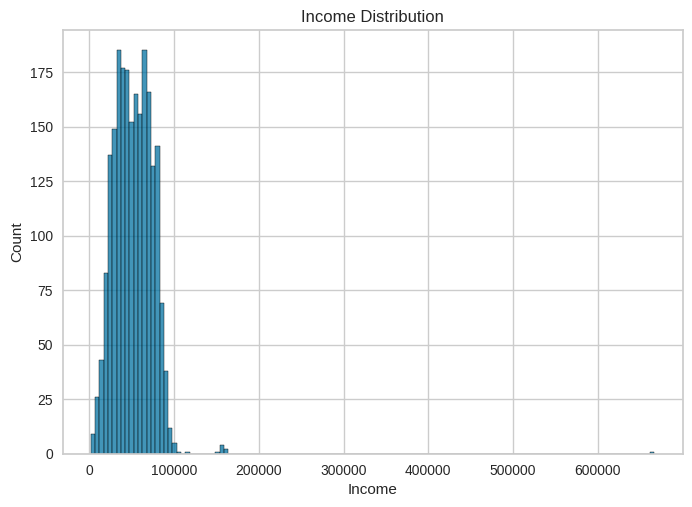

The mean income is 52247.25135379061
The median income is 51381.5


In [ ]:
sns.histplot(data['Income'])
plt.title("Income Distribution")
plt.show()
print(f"The mean income is {data['Income'].mean()}")
print(f"The median income is {data['Income'].median()}")

##### **Observations:**
- The Income row has missing values since other rows have 2240 non-null(not empty) values and Income row has 2216 rows. Which means that Income row is missing 16 rows.
- The income data is slightly right skewed as can be seen from the graph. Data is right skewed also since the  mean is larger than the median. Hence we need to fill the missing values with median value.

In [ ]:
# filling the Null values with median values
data['Income'] = data['Income'].fillna(data['Income'].median())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### **Question 4**: Are there any duplicates in the data?

In [ ]:
# shows the number of unique values per column.
# If any column has fewer unique values than total rows, duplicates exist.
print(f" Unique values per column: \n{data.nunique()}. \nAnd the total rows number is {len(data)}")



 Unique values per column: 
ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64. 
And the total rows number is 2240


##### **Observations:**
- Since the total rows number is 2240 the only field that has no duplicates is the "ID" column. Other columns have duplicates.

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

Column Title ID
Skew: 0.04


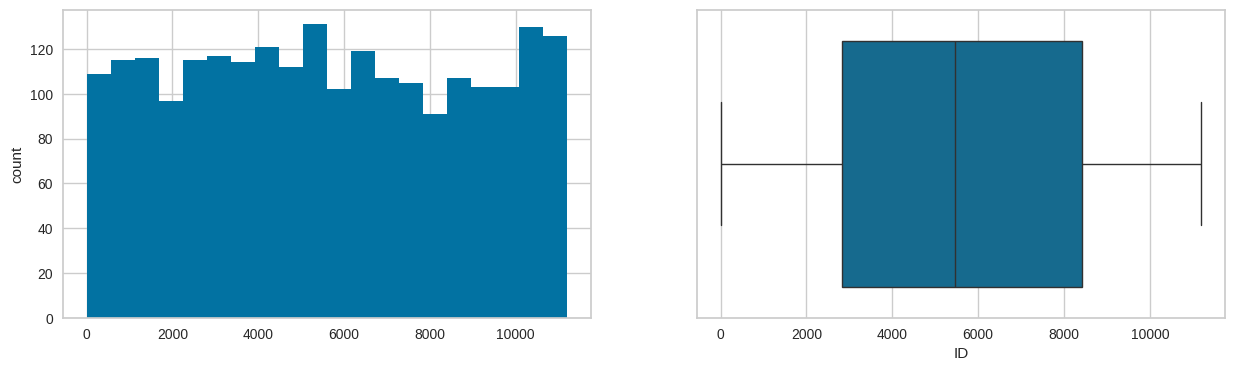

Column Title Year_Birth
Skew: -0.35


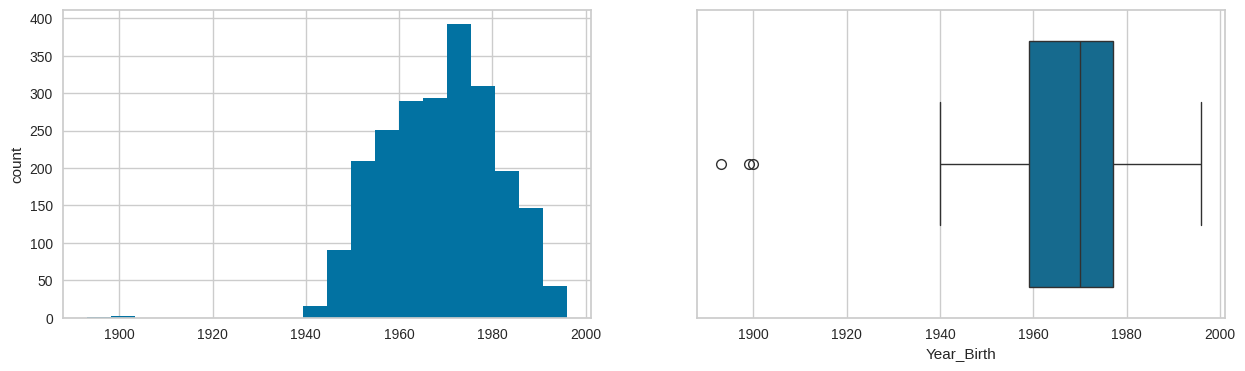

Column Title Education


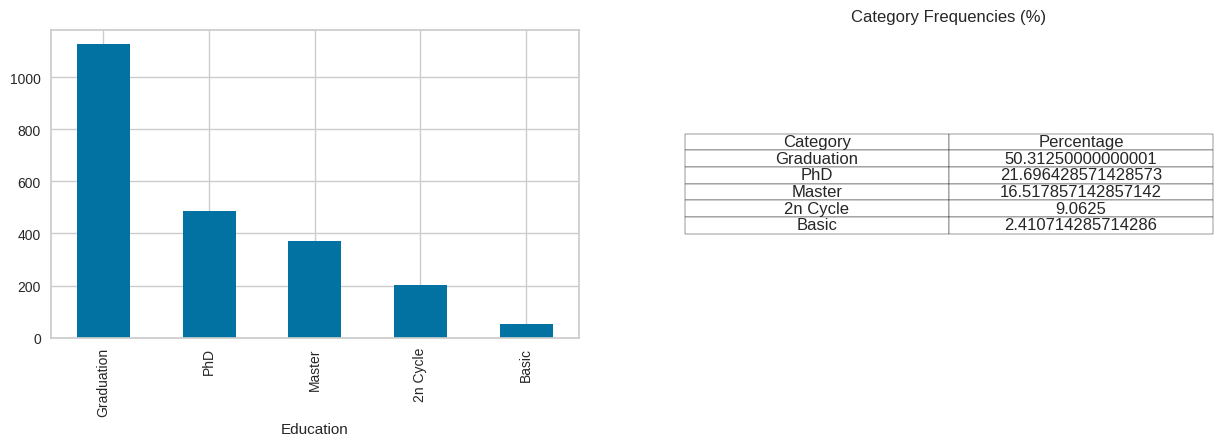

Column Title Marital_Status


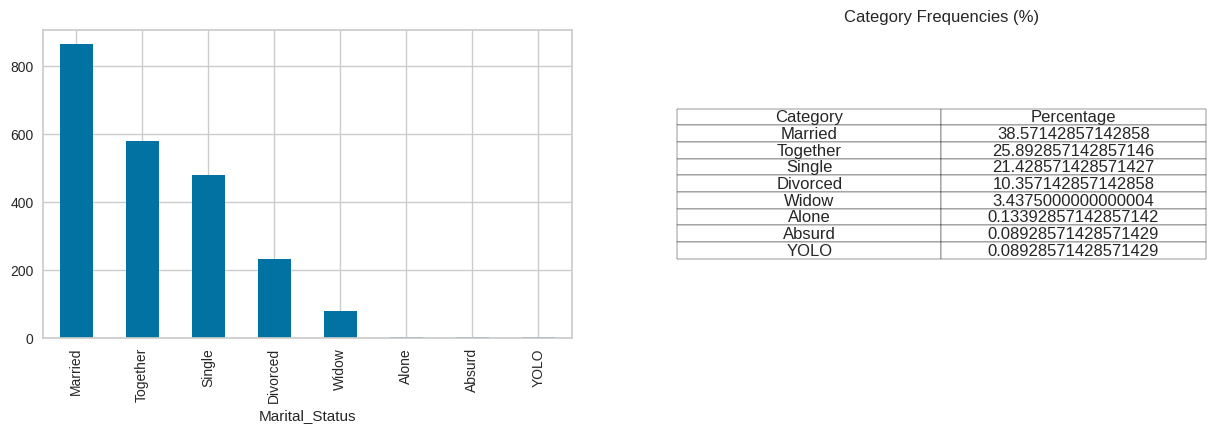

Column Title Income
Skew: 6.8


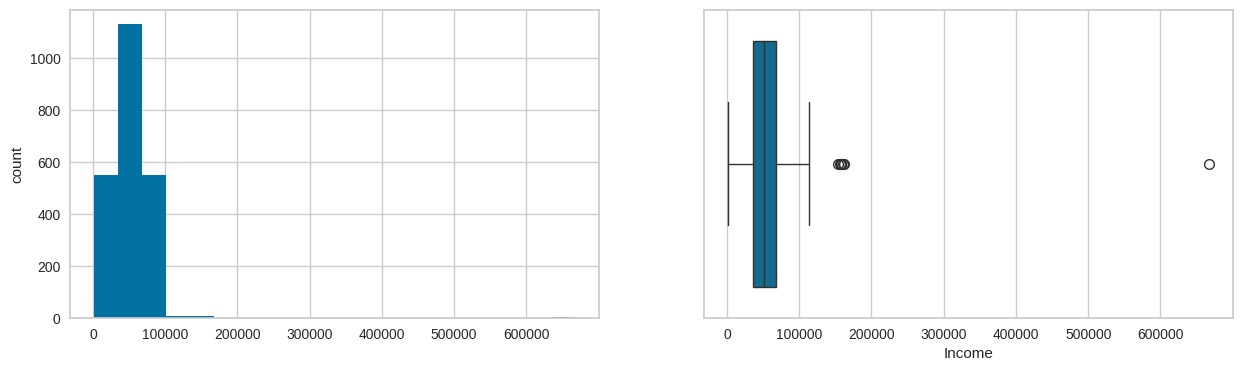

Column Title Kidhome
Skew: 0.64


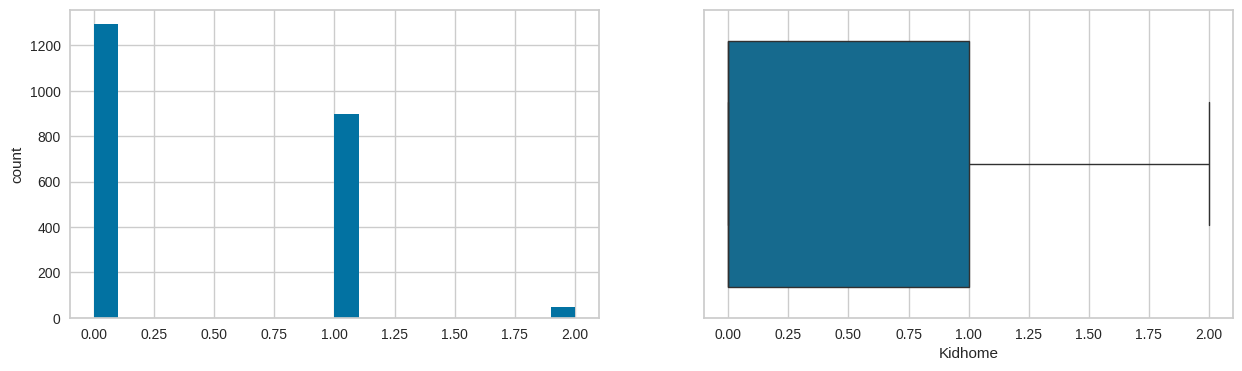

Column Title Teenhome
Skew: 0.41


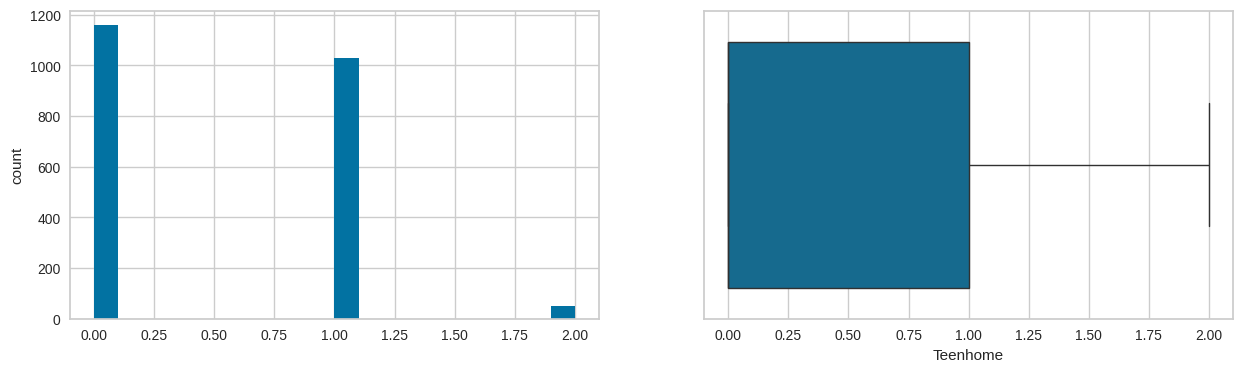

Column Title Dt_Customer


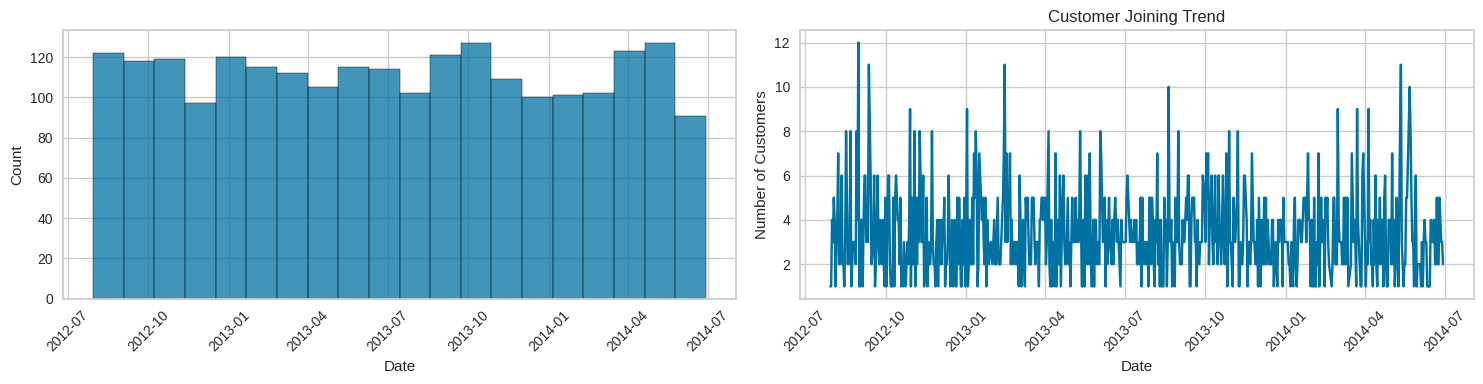

Column Title Recency
Skew: -0.0


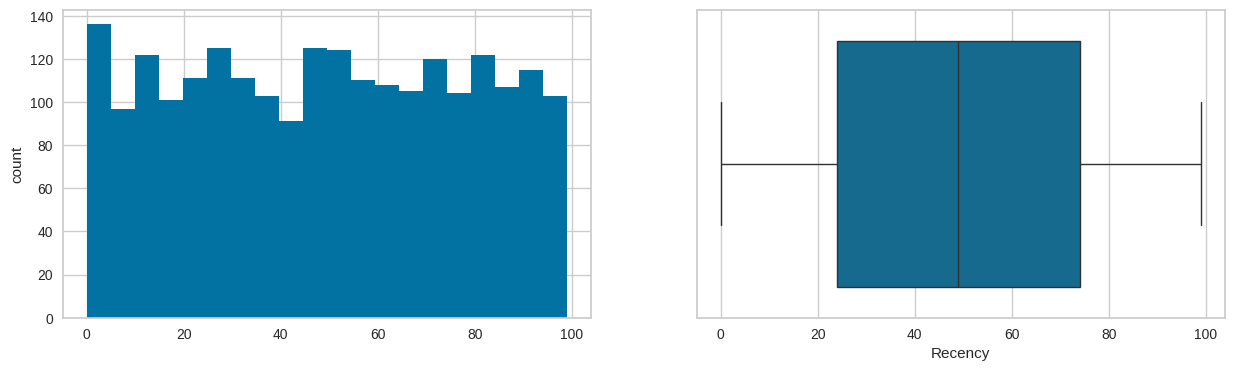

Column Title MntWines
Skew: 1.18


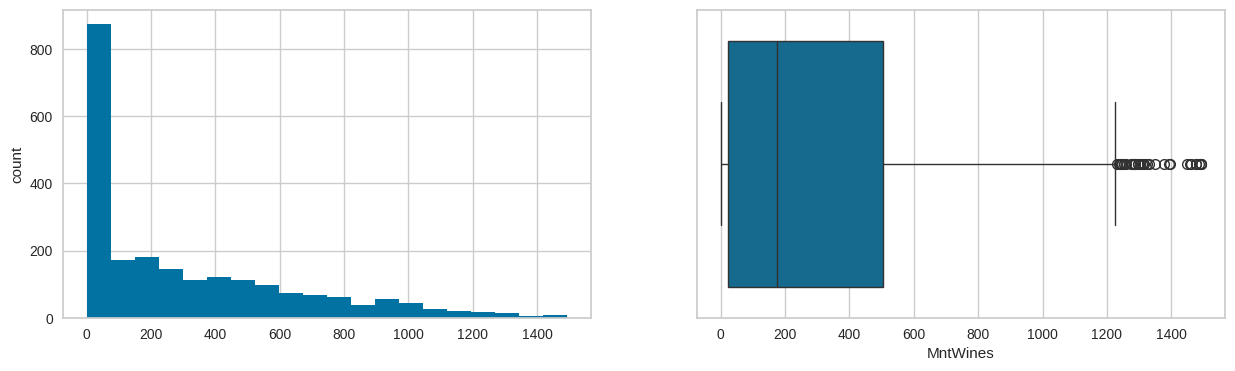

Column Title MntFruits
Skew: 2.1


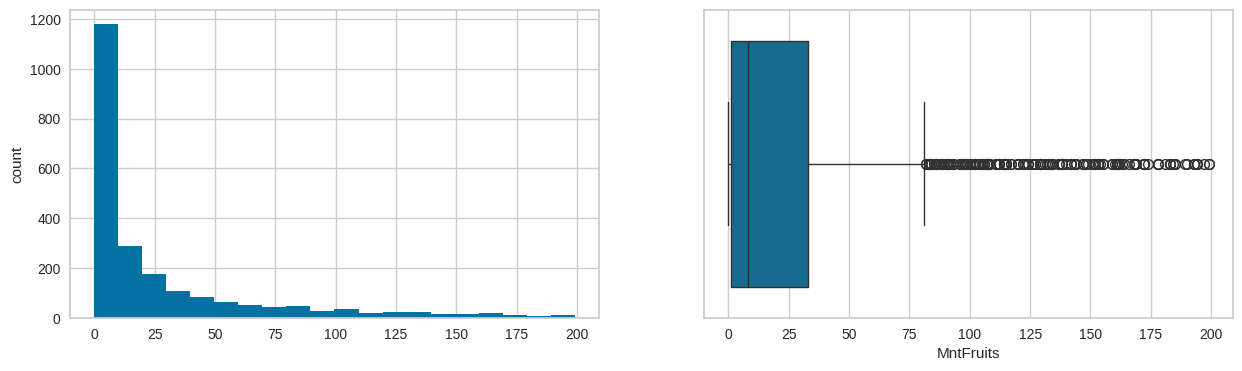

Column Title MntMeatProducts
Skew: 2.08


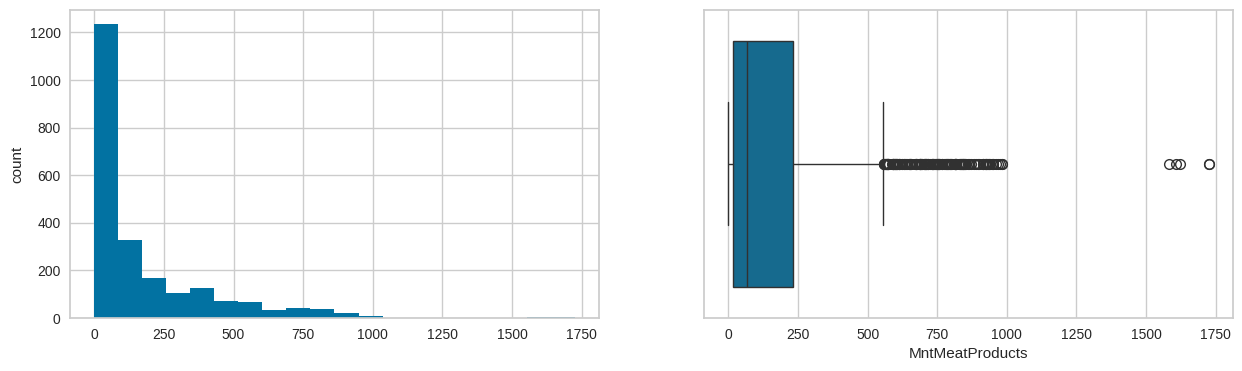

Column Title MntFishProducts
Skew: 1.92


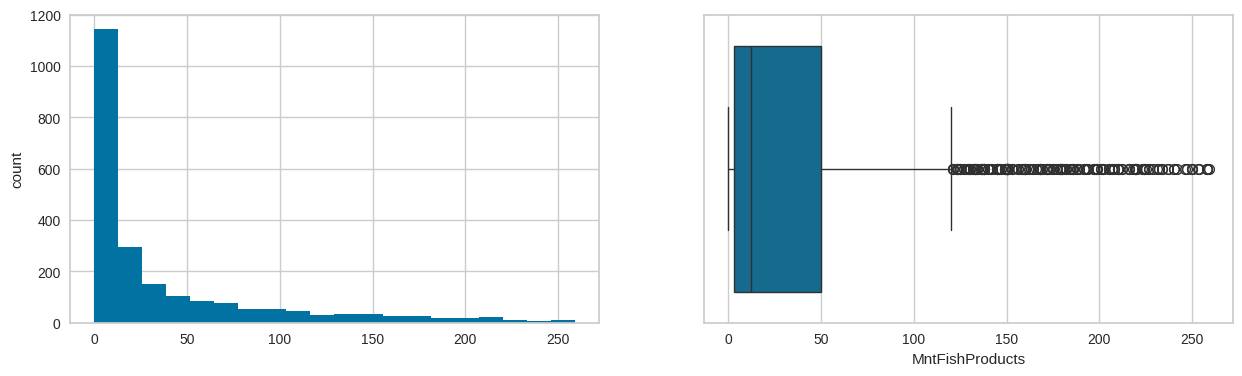

Column Title MntSweetProducts
Skew: 2.14


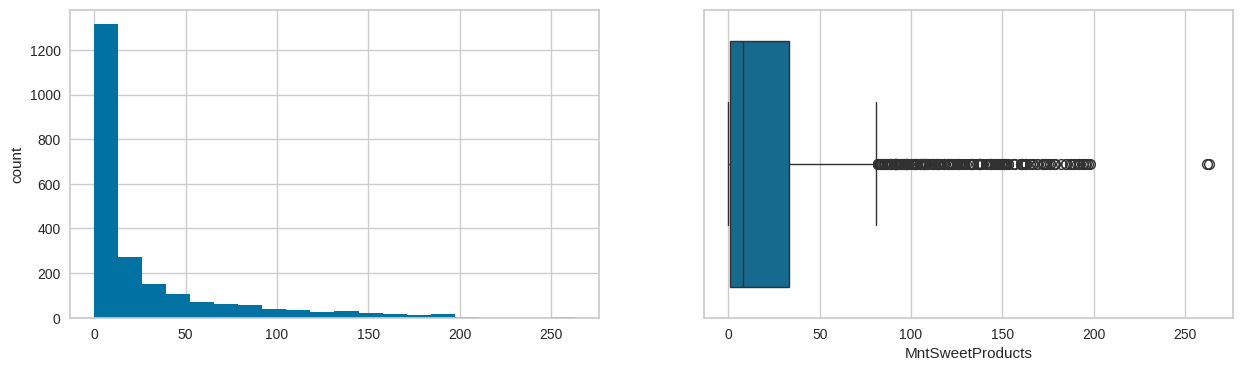

Column Title MntGoldProds
Skew: 1.89


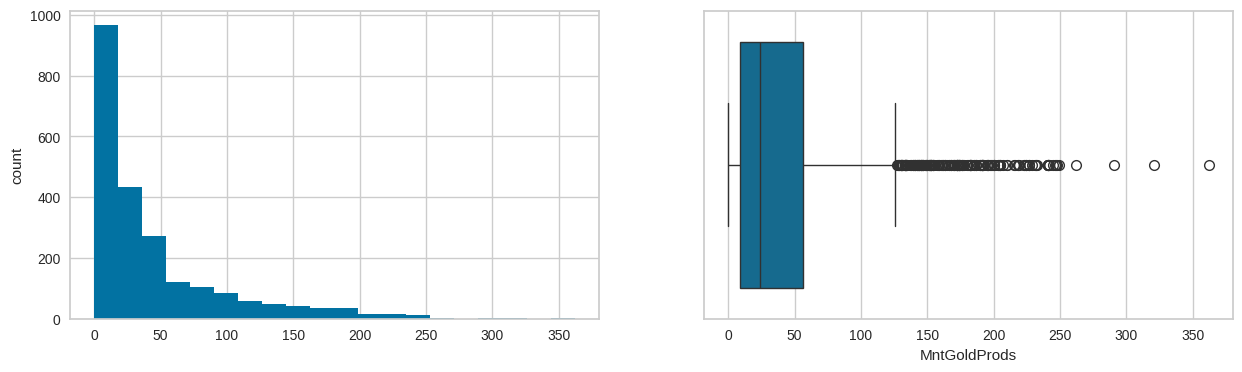

Column Title NumDealsPurchases
Skew: 2.42


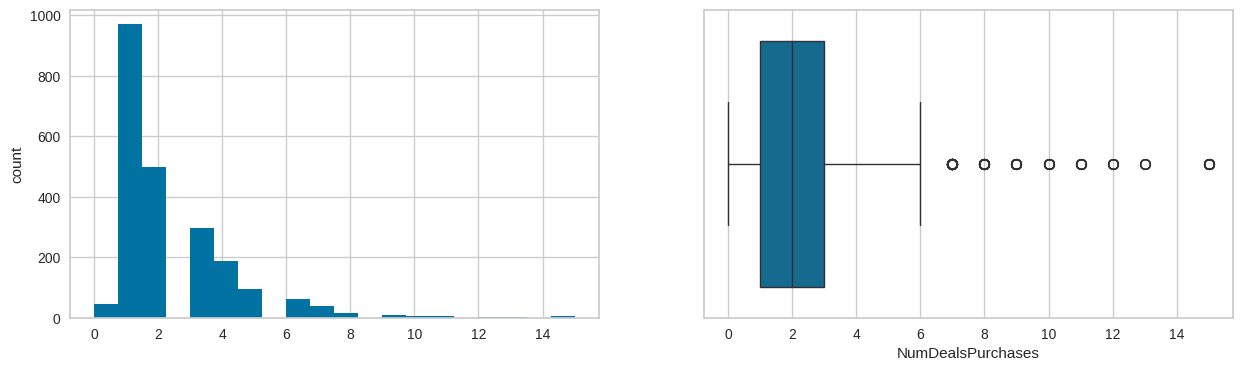

Column Title NumWebPurchases
Skew: 1.38


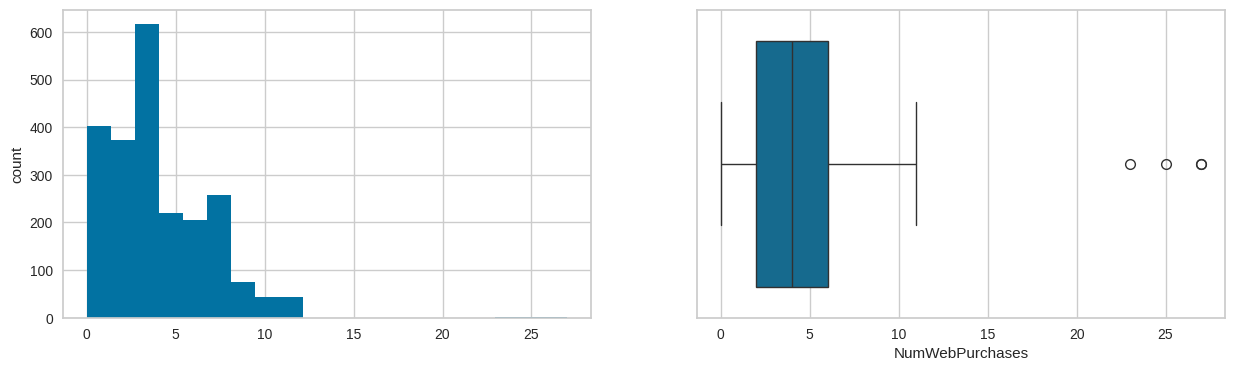

Column Title NumCatalogPurchases
Skew: 1.88


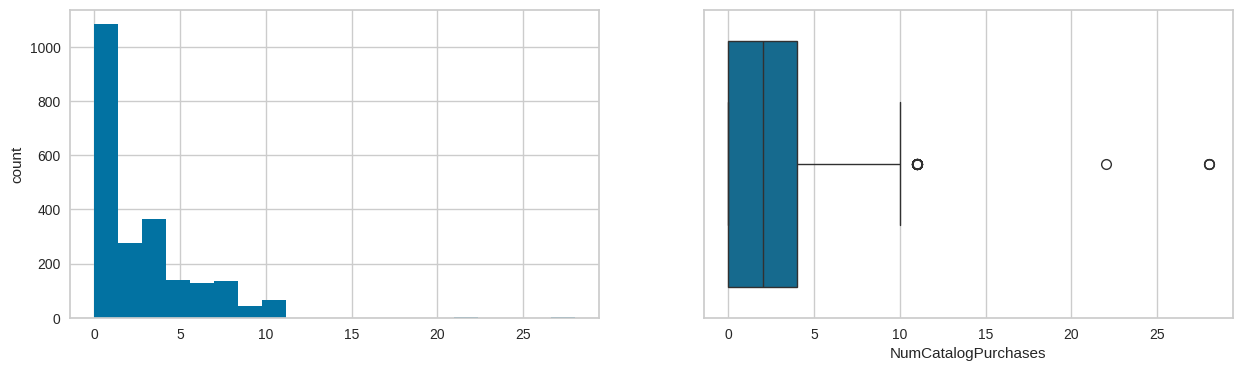

Column Title NumStorePurchases
Skew: 0.7


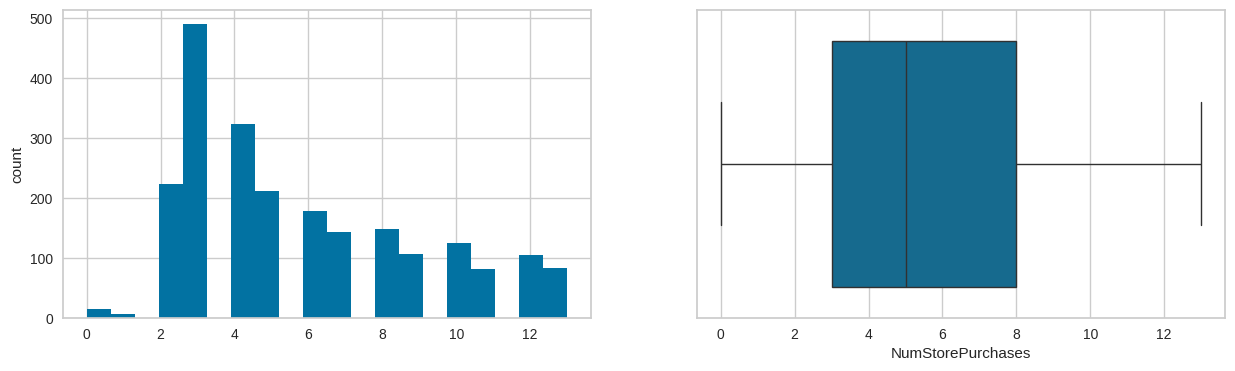

Column Title NumWebVisitsMonth
Skew: 0.21


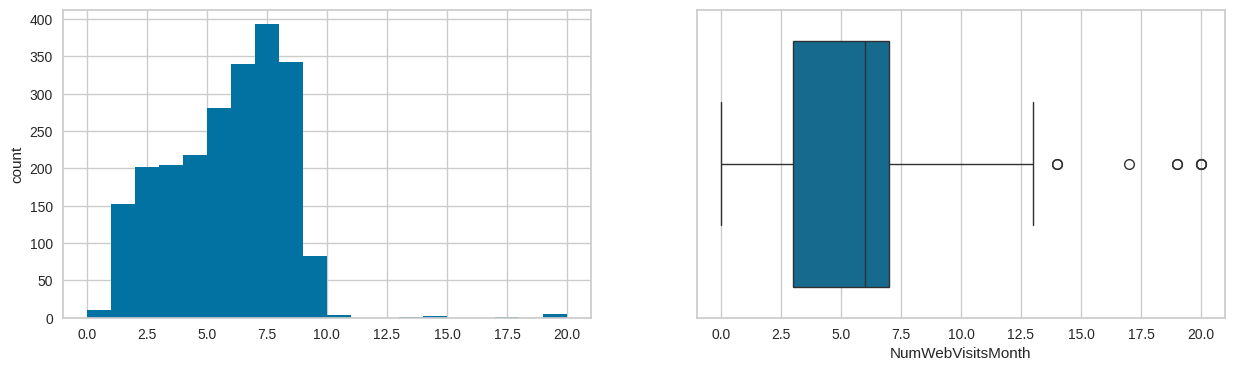

Column Title AcceptedCmp3


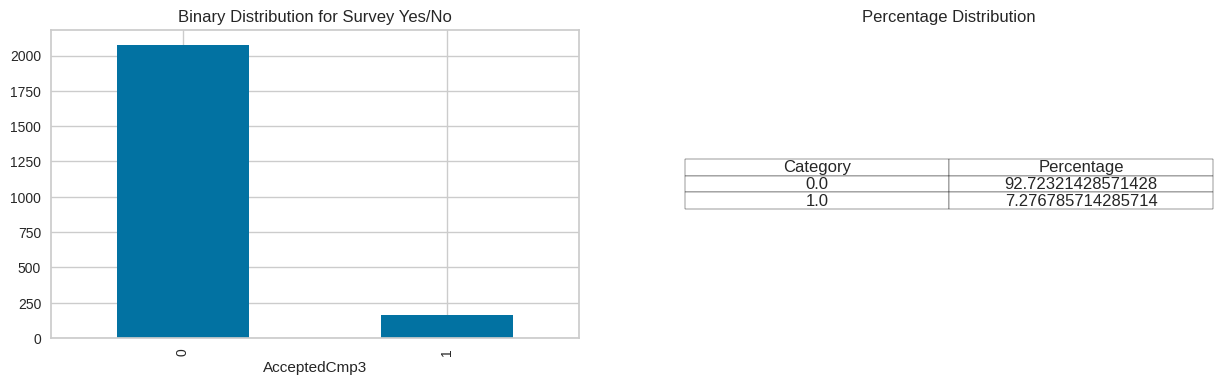

Column Title AcceptedCmp4


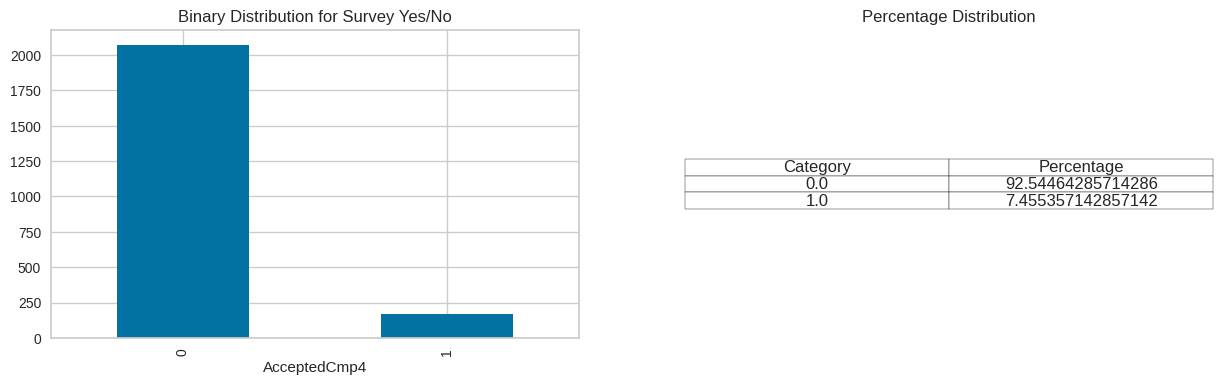

Column Title AcceptedCmp5


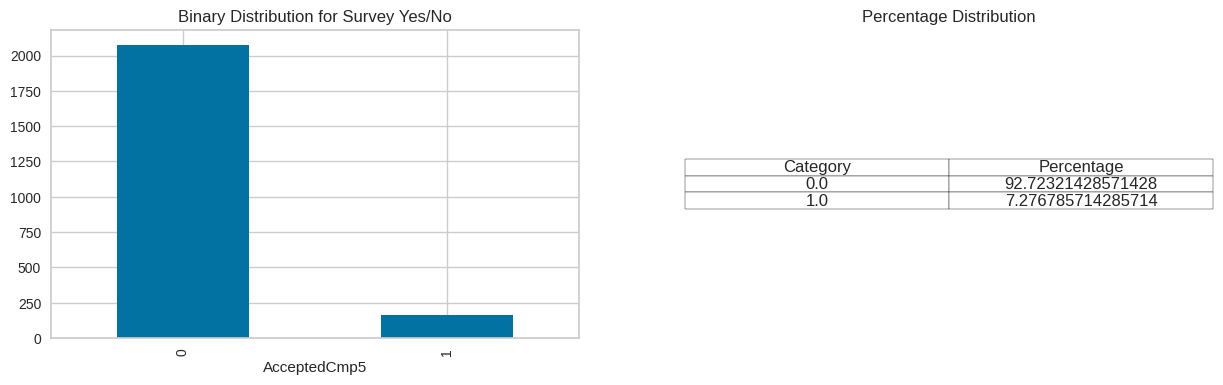

Column Title AcceptedCmp1


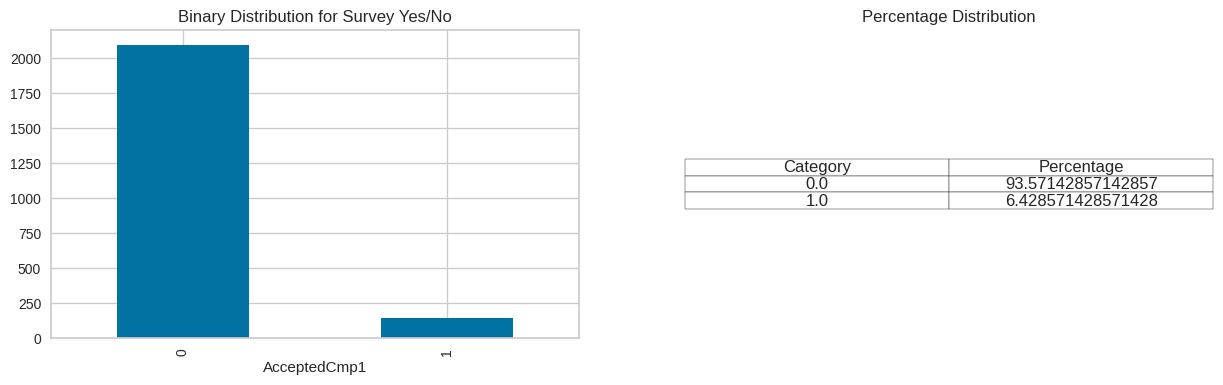

Column Title AcceptedCmp2


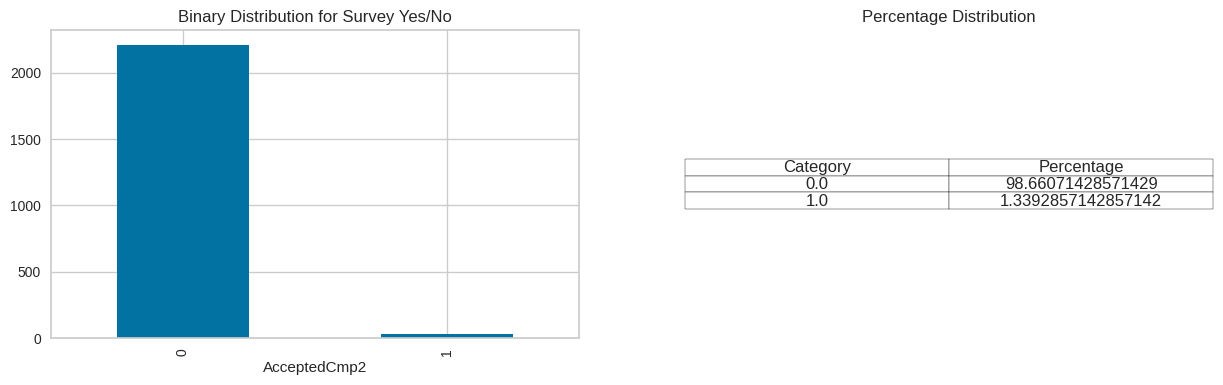

Column Title Complain


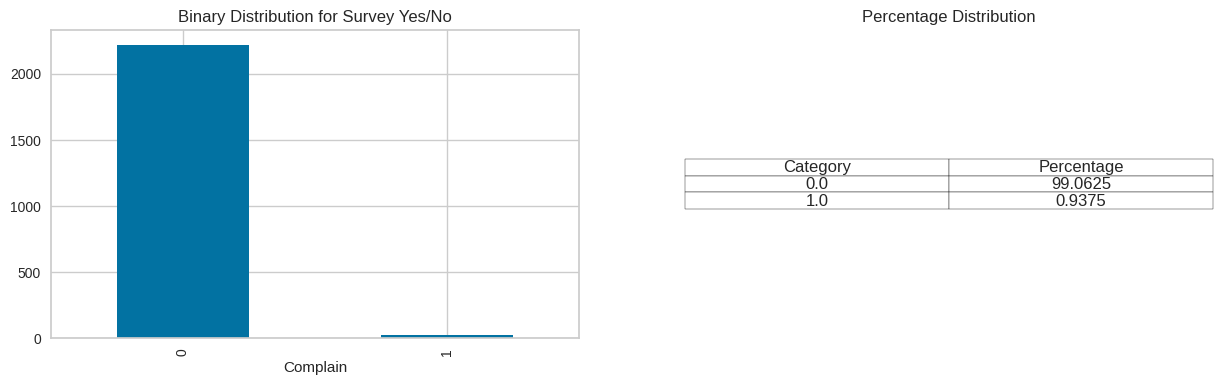

Column Title Z_CostContact
Skew: 0.0


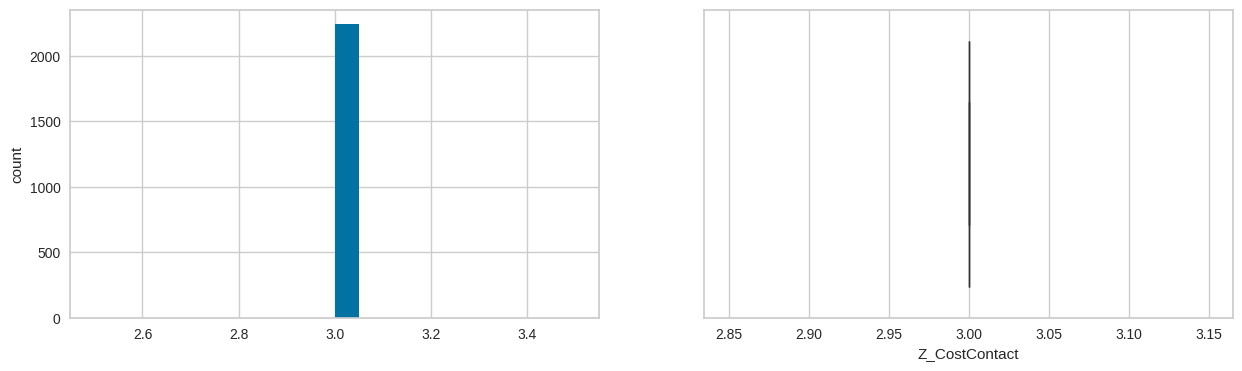

Column Title Z_Revenue
Skew: 0.0


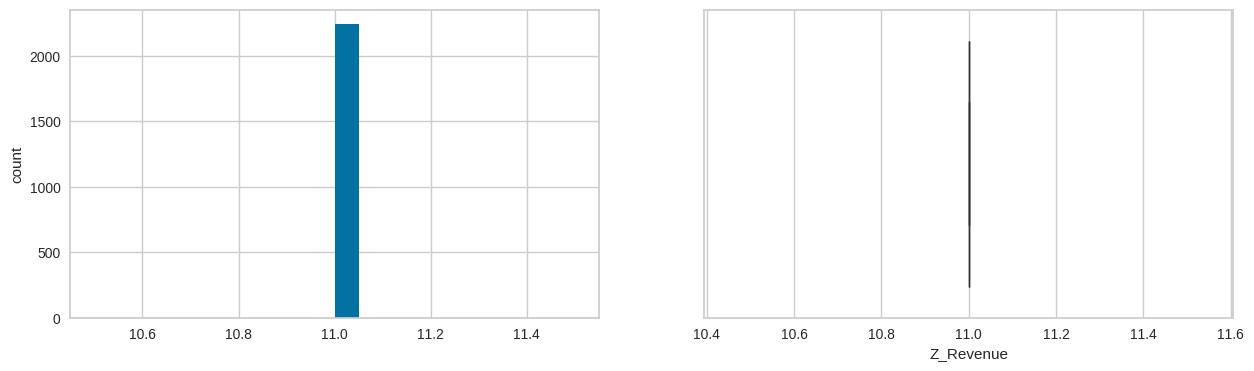

Column Title Response


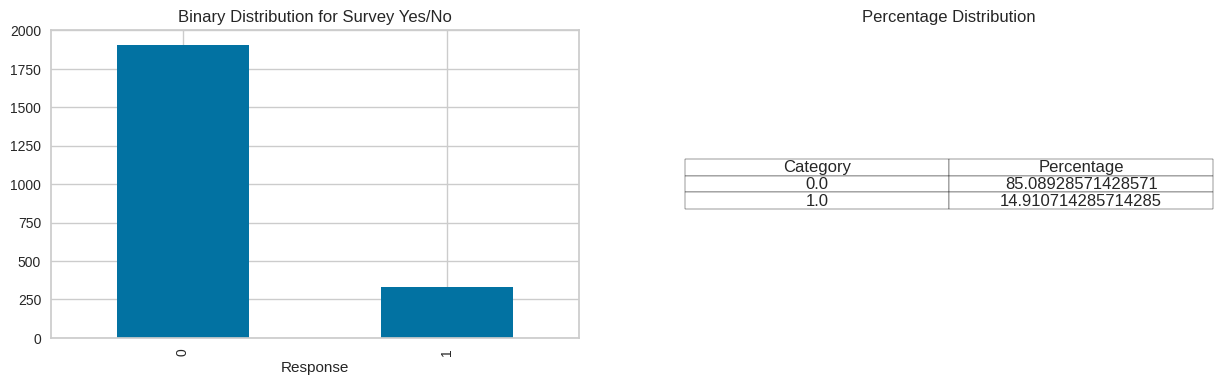

In [ ]:
'''
The Dt_Customer contains customer join date data. So the plot will be a
histogram and trend plot.
Categorical data cannot be described by histogram plot and box plot.
Hence bar plot and frequency table will be used for categorical data.
For other data types, histogram and box plot will be used.

'''

for column in data.columns:
  # printing column names
  print("Column Title", column)

  plt.figure(figsize=(15, 4))

  # Check for binary columns (0/1) from the surveys
  unique_values = data[column].unique()


  if column == 'Dt_Customer':  # if the type is Dt_Customer then plot a histogram and a box plot

        # Convert string date to python datetime format
        data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True)

        plt.subplot(1, 2, 1)
        sns.histplot(data[column], bins=20, kde=False)

        plt.xlabel('Date')
        plt.ylabel('Count')
        plt.xticks(rotation=45)

        plt.subplot(1, 2, 2)
        # Create daily counts and plot as line
        date_counts = data[column].value_counts().sort_index()
        sns.lineplot(x=date_counts.index, y=date_counts.values)

        plt.xlabel('Date')
        plt.ylabel('Number of Customers')
        plt.title('Customer Joining Trend')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()
        continue  # Skip the rest of the loop to save time

  elif set(unique_values) <= {0, 1}: # The survey responses will be treated as categorical data

        # data[column] = data[column].map({0: 'No', 1: 'Yes'}).astype('category')

        plt.subplot(1, 2, 1)
        data[column].value_counts().plot(kind='bar')
        plt.title('Binary Distribution for Survey Yes/No')

        plt.subplot(1, 2, 2)
        freq_table = data[column].value_counts(normalize=True).reset_index()
        freq_table.columns = ['Category', 'Percentage']
        freq_table['Percentage'] = freq_table['Percentage'] * 100
        plt.table(cellText=freq_table.values,
                colLabels=freq_table.columns,
                loc='center',
                cellLoc='center')
        plt.axis('off')
        plt.title('Percentage Distribution')

        plt.show()
        continue

  elif pd.api.types.is_numeric_dtype(data[column]): # for numeric data

    plt.subplot(1,2,1)
    data[column].hist(bins=20, grid=True)
    # calculates skewedness and rounds it to two decimals, possible for numerical data
    print('Skew:', round(data[column].skew(),2))
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[column])
    plt.show()



  else:
    # For categorical data, histogram representation is not possible
    # So, the bar plots were used and a frequency table for a better presentation
    plt.subplot(1,2,1)
    data[column].value_counts().plot(kind='bar')
    #Frequency table visualization
    plt.subplot(1,2,2)
    freq_table = data[column].value_counts(normalize=True).reset_index()
    freq_table.columns = ['Category', 'Percentage']
    freq_table['Percentage'] = freq_table['Percentage'] * 100
    plt.table(cellText=freq_table.values,
                 colLabels=freq_table.columns,
                 loc='center',
                 cellLoc='center')
    plt.axis('off')
    plt.title('Category Frequencies (%)')

    plt.show()






##### **Observations:**
### **Conclusion**

The dataset provides valuable insights into customer demographics, purchasing behavior, and engagement patterns. Key findings include:

- **Demographics**:
  - Most customers are middle-aged (after verifying outliers in `Year_Birth`), hold a bachelor's degree, and are married.
  - Income is concentrated between **33K-66K**, with a few high earners.
  - Most households have **no children or teens**, suggesting a focus on smaller families.

- **Purchasing Behavior**:
  - Spending is **highly right-skewed**, with most customers making budget-friendly purchases, though premium buyers exist.
  - **Discount usage** is common, with many customers taking advantage of deals at least once.
  - **Physical stores remain a key sales channel**, though online purchases are also frequent (median: 4 web purchases).

- **Customer Engagement**:
  - **Web visits per month** typically range from **5-9**, indicating moderate online engagement.
  - **Recency of purchases** shows no strong pattern, suggesting varied buying cycles.

### **Recommendations for Action**:
1. **Verify Outliers** (e.g., birth years in the 1800s and early 1900s, extreme income values) to ensure data accuracy.
2. **Optimize Multi-Channel Sales** by strengthening both in-store and online purchasing experiences.
3. **Explore Time-Series Trends** in customer enrollment dates to identify seasonal patterns.


### **Detailed observations (Optional to read):**
### **Year_Birth**
- Contains outliers (e.g., 1800s, early 1900s), likely due to data errors or outdated records
- **Recommendation**: Verify these entries - they may represent deceased customers or input mistakes.
- Otherwise follows a normal distribution

### **Education**
- The majority hold a **bachelor's degree** (Graduation), followed by Master's and PhD

### **Marital Status**
- Most customers are **married**, with significant portions also divorced, single, or in a relationship ("Together")

### **Income**
- Concentrated between **33K-66K**, with few high-income outliers (150K+)
- One extreme outlier (680K)

### **Household Composition**
- Most have no children, followed by those with one child
- Similarly, few households have teens (mostly 0-1)

## **Customer Engagement & Purchasing Behavior**

### **Dt_Customer (Enrollment Date)**
- No clear trend in sign-up dates
- **Recommendation**: A more in depth **time-series trend analysis** may be more insightful than a simple trend analysis

### **Recency (Days Since Last Purchase)**
- Distribution appears close to **uniform**, suggesting no strong pattern in purchase timing

### **Survey Responses**
- Most responses were **"No"**

## **Spending Habits**

### **Product Purchases (MntWines, MntFruits, etc.)**
- **Highly right-skewed** - most customers spend little, with few high spenders
- **Implication**: Majority prefer **budget-friendly products**, but premium buyers exist

### **Discount Purchases (NumDealsPurchases)**
- Right-skewed, but **most customers used a discount at least once**

## **Purchase Channels**

### **Web Purchases**
- Peak at **0-5 purchases**, median at **4**
- Suggests many customers make **few online transactions**

### **In-Store Purchases**
- Right-skewed, median at **5** (25th percentile: 3, 75th: 8)
- **Key Insight**: Physical stores remain significant channel

### **Web Visits Per Month**
- Typically **5-9 visits**, median at **6** (25th: 3, 75th: 7)
- Right-skewed due to **frequent visitors (outliers)**






### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

In [ ]:
# before the multivariate analysis the columns which are not relevant will be removed.
# from the exploratory data anaysis it was found that the Dt_Customer, ID did not contain any valuable data
# Z_CostContact and Z_Revenue is the same for all entries. Hence are removed

columns_to_remove = ['Dt_Customer', 'ID', 'Z_CostContact', 'Z_Revenue']
data.drop(columns=columns_to_remove, inplace=True)

In [ ]:
# before multivariate analysis categorical data of string data type will be converted to numerical data
'''
define education hierarchy in a map,
higher the education higher the number
Basic → 0
2n Cycle → 1
Graduation → 2
Master → 3
PhD → 4
'''
education_to_numbers = {
    'Basic': 0,
    '2n Cycle': 1,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4
}

data['Education'] = data['Education'].replace(education_to_numbers)

# Marital status needs to have more generic groups for more intuitive numbering and representation.
# Unite all categories into 3 core groups
data['Marital_Status_Group'] = data['Marital_Status'].replace({
    # Core relationship groups
    'Married': 'Partnered',
    'Together': 'Partnered',

    # Single/unattached spectrum
    'Single': 'Unattached',
    'Divorced': 'Unattached',
    'Widow': 'Unattached',
    'Alone': 'Unattached',

    # Noise/invalid
    'YOLO': 'Other',
    'Absurd': 'Other'
})

# More simplified numerical mapping
group_order = {
    'Partnered': 1,    # All coupled people
    'Unattached': 0,   # All single/separated individuals
    'Other': -1        # Invalid data
}

# Apply numerical encoding
data['Status_Code'] = data['Marital_Status_Group'].map(group_order)




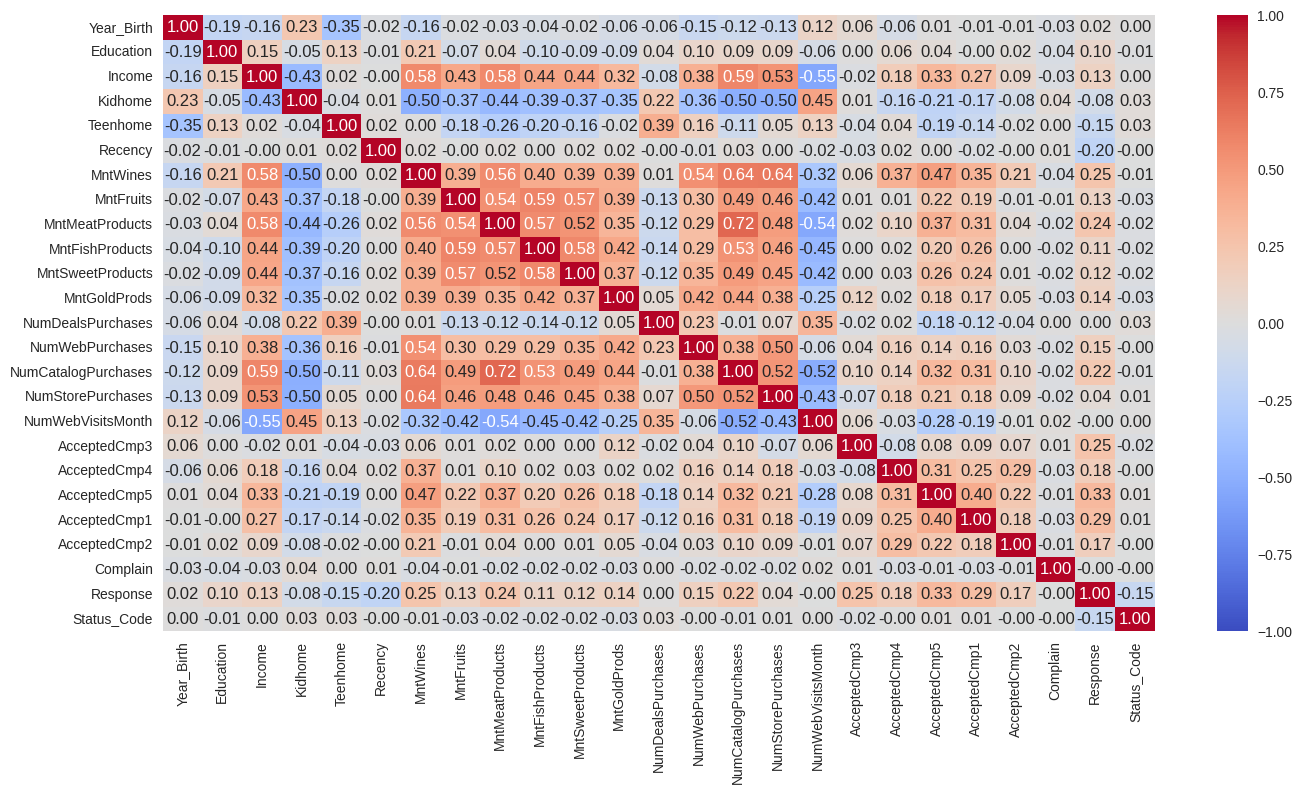

In [ ]:
# Let's explore correlation matrix heatmap
# selecting only numeric columns,
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

correl_matrix = data[numeric_columns].corr()

plt.figure(figsize=(16,8))
sns.heatmap(correl_matrix, annot=True, fmt='0.2f', cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.show()

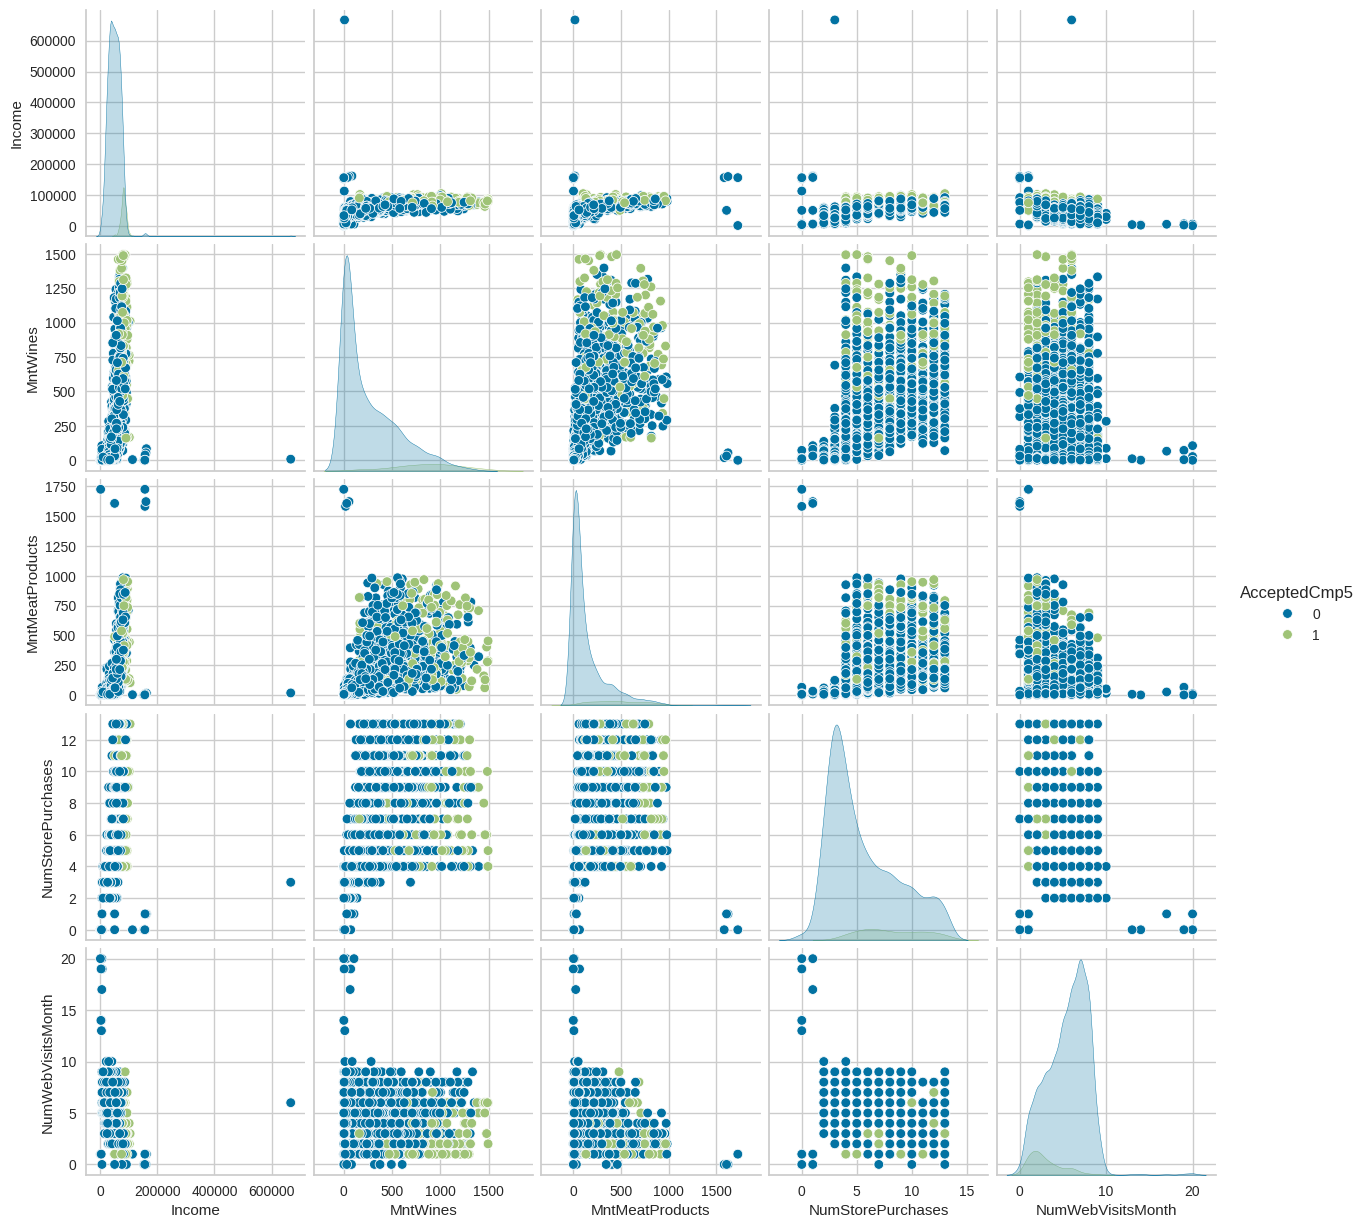

In [ ]:
sns.pairplot(
    data,
    vars=['Income', 'MntWines', 'MntMeatProducts', 'NumStorePurchases', 'NumWebVisitsMonth'],
    hue='AcceptedCmp5',

    kind='scatter',
    corner=False
)
plt.show()

**Observation**
- High income correlates strongly with spending on meat, wines.  
- Higher-income customers buy more in-store.
- Higher-income customers were more likely to respond positively to the **campain 5**.


---

Conclusion:
Premium products promotions need to be held in the stores rather than online, since the high-end customers do not visit the web very often.

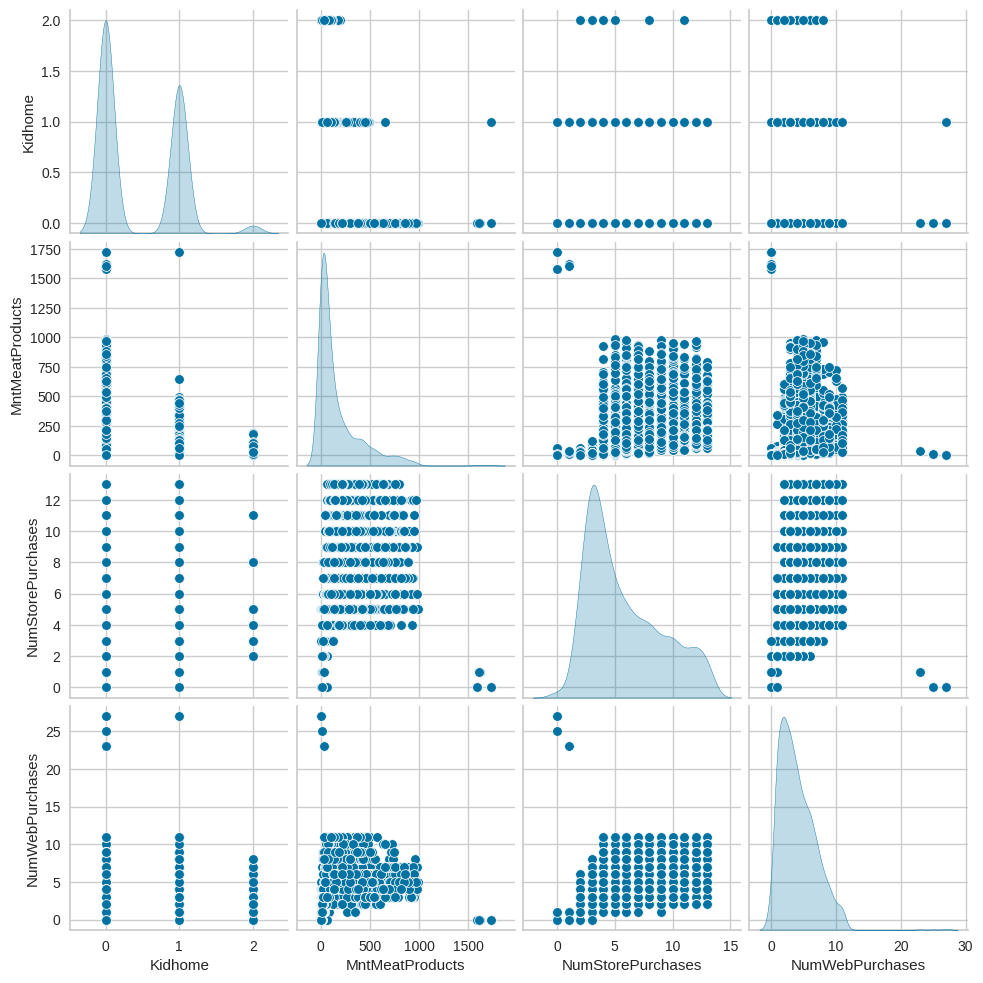

In [ ]:
sns.pairplot(
    data,
    vars=['Kidhome', 'MntMeatProducts', 'NumStorePurchases', 'NumWebPurchases'],

    diag_kind='kde',
    corner=False
)
plt.show()

**Observation**
- As number of kids increase the in store visits become less common.
- There is only a small change on the web purchaces if the nunber of kids increases.


---

Conclusion: Family related deals and campains need to be promoted in the online stores.  


##### **Observations:**


## Key Observations from the Correlation Matrix

### Strong Positive Correlations (>= 0.5):
- **Income vs Spending**:  
  - Income correlates strongly with spending on meat (`0.58`), fish (`0.44`), and sweets (`0.44`).  
  - Higher-income customers buy more via catalogs (`0.59`) and in-store (`0.58`).  
- **Parenting Status vs Spending**:  
  - `Kidhome`/`Teenhome` correlate with reduced spending (e.g., `Kidhome` vs `MntWines`: `-0.23`).  
- **Campaign Responses**:  
  - Customers who accepted Campaign 5 (`AcceptedCmp5`) also responded to Campaigns 1 (`0.40`) and 4 (`0.31`). Campain 5 positive respondents also had a small positive correlation with (`Income`) which was (`0.34`).   

### Strong Negative Correlations (<= -0.5):
- **Web Visits vs Store Purchases**:  
  - Frequent website visitors (`NumWebVisitsMonth`) buy less in-store (`-0.48`).  

### Interesting Insights:
- `Complain` show almost no correlation (all values ≤ `0.04`).  
- `Recency` has negligible correlations.  

---

## 2. Customer Segmentation Insights
- **High-Income Shoppers**:  
  - Spend more on meat, fish, and catalogs.  
  - Prefer in-store shopping over web visits.  
- **Families with Kids/Teens**:  
  - Spend less overall.  
  - More likely to use discounts (`NumDealsPurchases`).  
- **Campaign-Responsive Customers**:  
  - Likely to respond to multiple campaigns (e.g., `AcceptedCmp5` ↔ `AcceptedCmp1`).  

---

## 3. Marketing Recommendations
1. **Target High-Income Households**:  
   - Promote premium products via catalogs and in-store offers.  
2. **Families with Children**:  
   - Offer discounts or family-oriented deals.  
3. **Campaign Strategies**:  
   - Focus on customers who responded to **Campaigns 1, 4, or 5**.   

---



**Data preprocessing**

In [ ]:
# the following categorical data had little to no correlation to other data, hence they are dropped
columns_to_drop = ['Education', 'Marital_Status', 'Marital_Status_Group', 'Status_Code']
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
columns_to_drop = ['Year_Birth', 'Recency', 'Complain']
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
columns_to_drop = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# remove extreme outliers
data = data[data['Income'] < 200000]


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
subset = data.copy()
subset_scaled_data=pd.DataFrame(scaler.fit_transform(subset), columns=subset.columns)

## **K-means Clustering**

In [ ]:
#Creating copy of the data to store labels from each algorithm
Kmeans_data_scaled = subset_scaled_data.copy(deep=True)

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

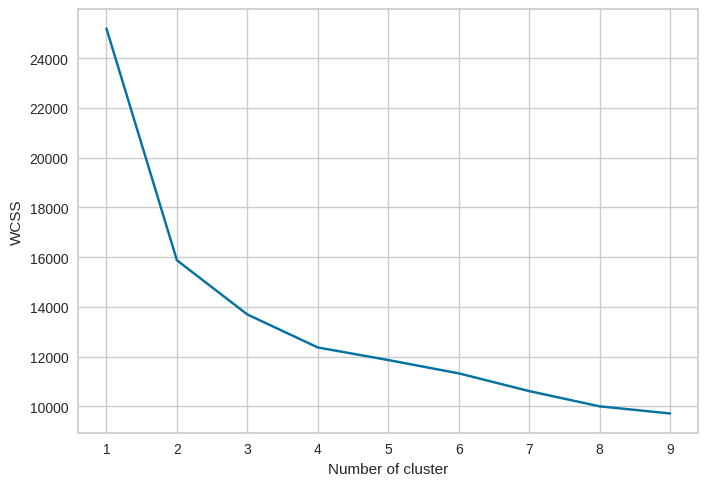

In [ ]:
WCSS = {}

# iterate for a range of Ks and fit the scaled data to the algorithm.

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(Kmeans_data_scaled)
    WCSS[k] = kmeans.inertia_


plt.figure()
plt.plot(list(WCSS.keys()), list(WCSS.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

##### **Observations:**
- Looking at the plot, we can say that elbow point is achieved for k=2.
- We will fit the k-means again with k=2 to get the labels.

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

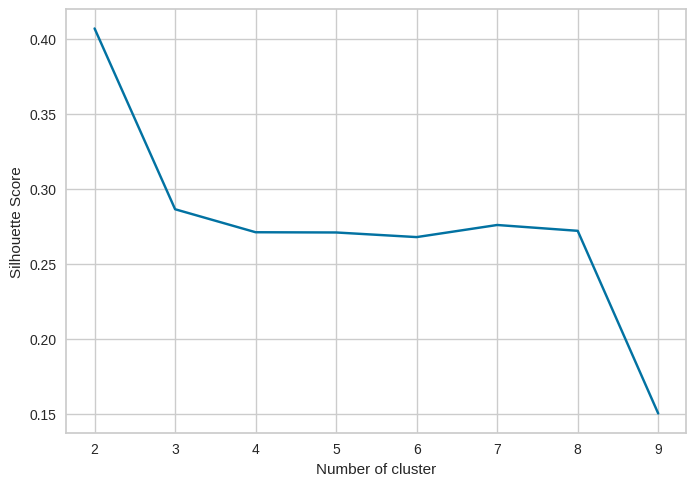

In [ ]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {}

# iterate for a range of Ks and fit the scaled data to the algorithm.
# Store the Silhouette score for that k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(Kmeans_data_scaled)
    labels = kmeans.predict(Kmeans_data_scaled)
    sc[k] = silhouette_score(Kmeans_data_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

**Observations**
# Silhouette Score Evaluation

The silhouette scores for cluster numbers k=2 through k=9 show:

- **Best performance at k=2** (score = 0.43) - moderate cluster structure
- **Gradual decline** as k increases (0.28 at k=3 , 0.26 at k=8)
- **No scores exceed 0.50** - indicating no strong cluster separation exists




#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [ ]:
%%time
kmeans = KMeans(n_clusters=2, max_iter= 1000, random_state=1)
kmeans.fit(Kmeans_data_scaled)



CPU times: user 6.25 ms, sys: 0 ns, total: 6.25 ms
Wall time: 7.65 ms


KMeans(max_iter=1000, n_clusters=2, random_state=1)

In [ ]:

data_clone1 = data.copy()

Kmeans_data_scaled["K_means_segments"] = kmeans.labels_
data_clone1["K_means_segments"] = kmeans.labels_

##### **Observations:**
The total elapsed time was 8.41 ms, relatively small execution time. It mean that the dataset is small and number of clusters is only 2. The data is likely well-structured and easily serarates into 2 clusters.

## **Hierarchical Clustering**

#### **Question 10**: Calculate the cophnetic correlation for every combination of distance metrics and linkage. Which combination has the highest cophnetic correlation?

In [ ]:
hc_data = subset_scaled_data.copy()

In [ ]:
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_data, metric=dm, method=lm) # Calculating the linkage with the distance metrics and linkage method.
        c, coph_dists = cophenet(Z, pdist(hc_data))
        print(
            "Cophenetic correlation: {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation: Euclidean distance and single linkage is 0.7891055502550333.
Cophenetic correlation: Euclidean distance and complete linkage is 0.7959592786396277.
Cophenetic correlation: Euclidean distance and average linkage is 0.8719139931014175.
Cophenetic correlation: Euclidean distance and weighted linkage is 0.781594078155102.
Cophenetic correlation: Chebyshev distance and single linkage is 0.5831512519724891.
Cophenetic correlation: Chebyshev distance and complete linkage is 0.7808835736096168.
Cophenetic correlation: Chebyshev distance and average linkage is 0.8650496553858263.
Cophenetic correlation: Chebyshev distance and weighted linkage is 0.7432950317841144.
Cophenetic correlation: Mahalanobis distance and single linkage is 0.6103881598164437.
Cophenetic correlation: Mahalanobis distance and complete linkage is 0.6354183655704695.
Cophenetic correlation: Mahalanobis distance and average linkage is 0.7377763042163944.
Cophenetic correlation: Mahalanobis distance an

##### **Observations:**

**Best Performing Method:**

Euclidean + Average Linkage (0.87)
This combination shows the highest correlation, indicating it best preserves the original distances

**Other Strong methods:**

Chebyshev + Average Linkage (0.865)

Cityblock + Single Linkage (0.83)

Cityblock + Average Linkage (0.825)

**Worst Performing Method:**

Cityblock + Complete Linkge (0.4795)
This combination performs poorly likely because complte linkage overestimates distances in this context.

**Generally:**

Average Linkage consistently outperforms other linkage methods across most distance metrics.

Single Linkage works well with Cityblock (0.8304) but poorly with Chebyshev (0.58)

Complete Linkage is unstable performing well with Euclidean (0.7960) but poorly with Cityblock (0.48).

#### **Question 11**: plot the dendogram for every linkage method with "Euclidean" distance only. What should be the appropriate linkage according to the plot?

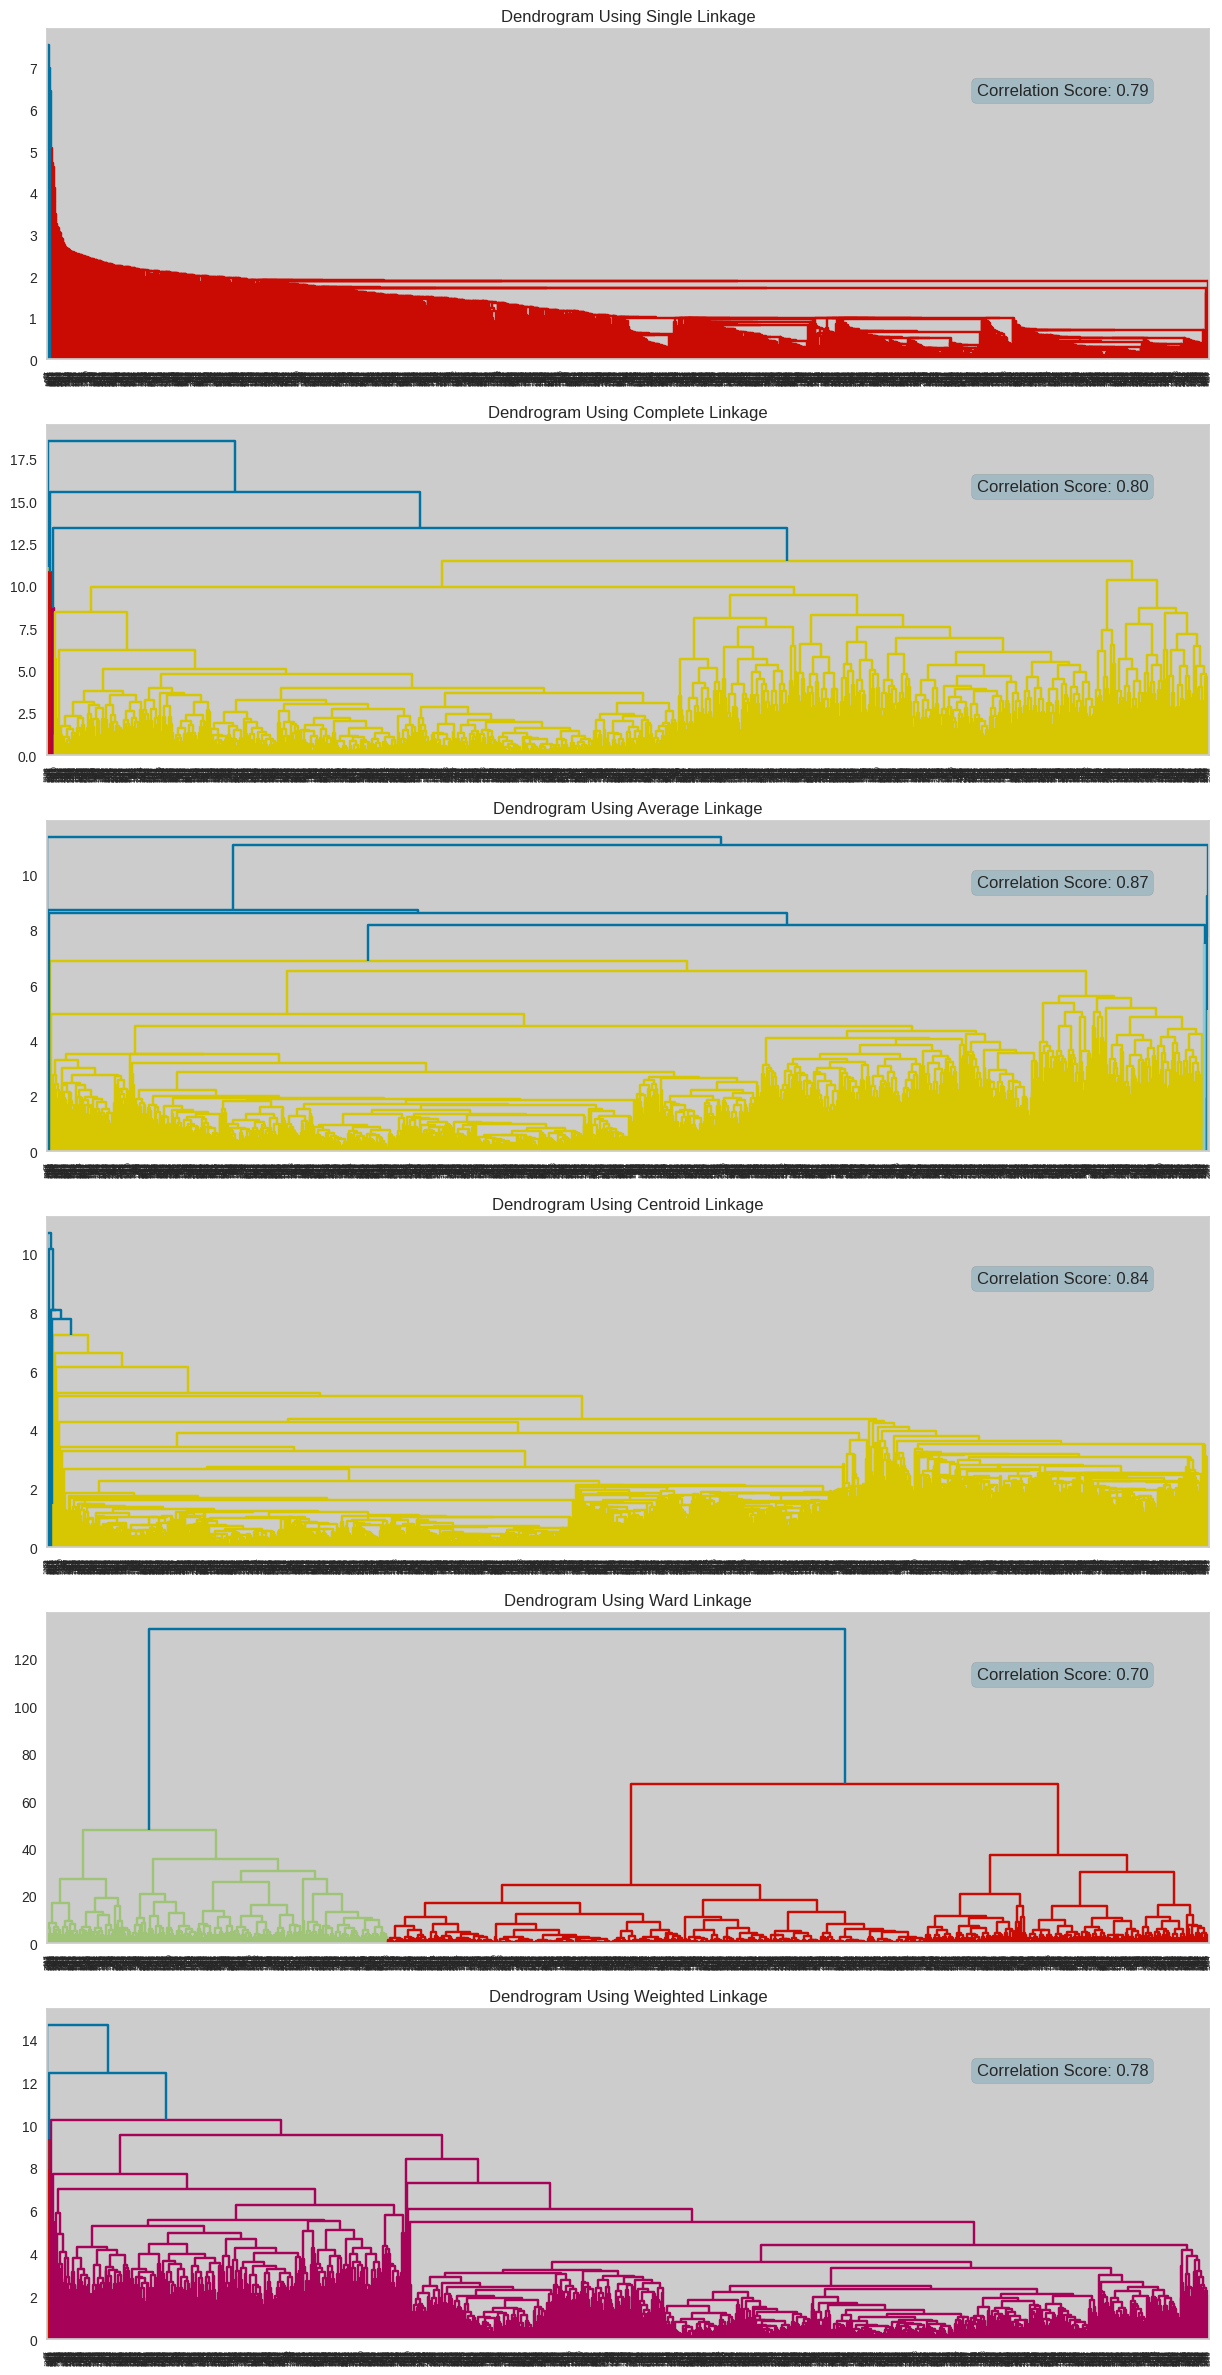

In [ ]:
# Define hierarchical clustering linkage methods to evaluate
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# Initialize storage for comparing method performance
compare_cols = ["Linkage Method", "Cophenetic Correlation Score"]
compare_results = []

# Create figure with subplots for each linkage method's dendrogram
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# Evaluate each linkage method's performance
for i, method in enumerate(linkage_methods):
    # 1. Compute hierarchical clustering
    Z = linkage(hc_data, metric="euclidean", method=method)

    # 2. Visualize cluster hierarchy as dendrogram
    dendrogram(Z, ax=axs[i])


    axs[i].set_title(f"Dendrogram Using {method.capitalize()} Linkage")

    # 3. Calculate cophenetic correlation (measures how well distances are preserved)
    coph_corr, coph_dist = cophenet(Z, pdist(hc_data))


    axs[i].annotate(
        f"Correlation Score: {coph_corr:.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
        bbox=dict(boxstyle="round", alpha=0.2)
    )


    compare_results.append([method, coph_corr])

method_comparison = pd.DataFrame(compare_results, columns=compare_cols)

##### **Observations:**

**Preferred Method:**
Use Euclidean distance + Average Linkage (0.8719) for the most reliable clustering.

**Alternative Options:**

Chebyshev + Average Linkage (0.8650) if Euclidean is unsuitable.

Cityblock + Single/Average Linkage (0.8304/0.8251) for specific use cases (e.g., Manhattan-like distances).

**Try to not use:**

Complete Linkage with Cityblock (0.4795) or Mahalanobis (0.6354).

#### **Question 12:** Check the silhoutte score for the hierchial clustering. What should be the appropriate number of clusters according to this plot?

In [ ]:
sil_score_hc = []
cluster_list = list(range(2, 10))

for n_clusters in cluster_list:
    # Initialize the model with current number of clusters
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)

    # Fit the model on the scaled data and get predictions
    preds = clusterer.fit_predict(hc_data)

    # Calculate silhouette score using the predictions
    score = silhouette_score(hc_data, preds)

    # Store and print results
    sil_score_hc.append(score)
    print("For n_clusters = {}, silhouette score is {:.3f}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.401
For n_clusters = 3, silhouette score is 0.270
For n_clusters = 4, silhouette score is 0.265
For n_clusters = 5, silhouette score is 0.260
For n_clusters = 6, silhouette score is 0.261
For n_clusters = 7, silhouette score is 0.264
For n_clusters = 8, silhouette score is 0.243
For n_clusters = 9, silhouette score is 0.245


##### **Observations:**

**Best score:**

n_clusters = 2 has the highest score (0.401), suggesting this is the most optima number of clusters for your data.

**Interpretation:**

0.401 = "Good enough structure" (values > 0.3 indicates some level of separation).

Scores decline sharply after 2 clusters implying further splits weaken cohesion.  Additional clusters may be redundant.

**Suboptimal Clusters (n => 3):**

Scores drop to ~0.26–0.27 for n_clusters = 3–7, indicating:

Clusters are weakly separated (near-zero scores).



For n_clusters ≥ 8, scores dip further (0.24–0.25), confirming overfitting.




#### **Question 13**: Fit the Hierarchial clustering model with the appropriate parameters finalized above. How much time does it take to fit the model?

In [ ]:
%%time
HCmodel = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="single") # Initialize the HC model with appropriate parameters.
HCmodel.fit(hc_data)

CPU times: user 101 ms, sys: 27 µs, total: 101 ms
Wall time: 88.2 ms


AgglomerativeClustering(linkage='single')

In [ ]:
data_clone2 = data.copy()
hc_data["HC_segments"] = HCmodel.labels_
data_clone2["HC_segments"] = HCmodel.labels_

In [ ]:
subset_scaled_data["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

**Observations**
- The runtime suggests the dataset is of moderate size - large enough that hierarchical clustering takes noticeable time but small enough to be practical
- The system time (101 ms) indicates some memory management overhead during the clustering

## **Cluster Profiling and Comparison**

### K-Means Clustering vs Hierarchical Clustering Comparison

#### **Question 14**: Perform and compare Cluster profiling on both algorithms using boxplots. Based on the all the observaions Which one of them provides better clustering?

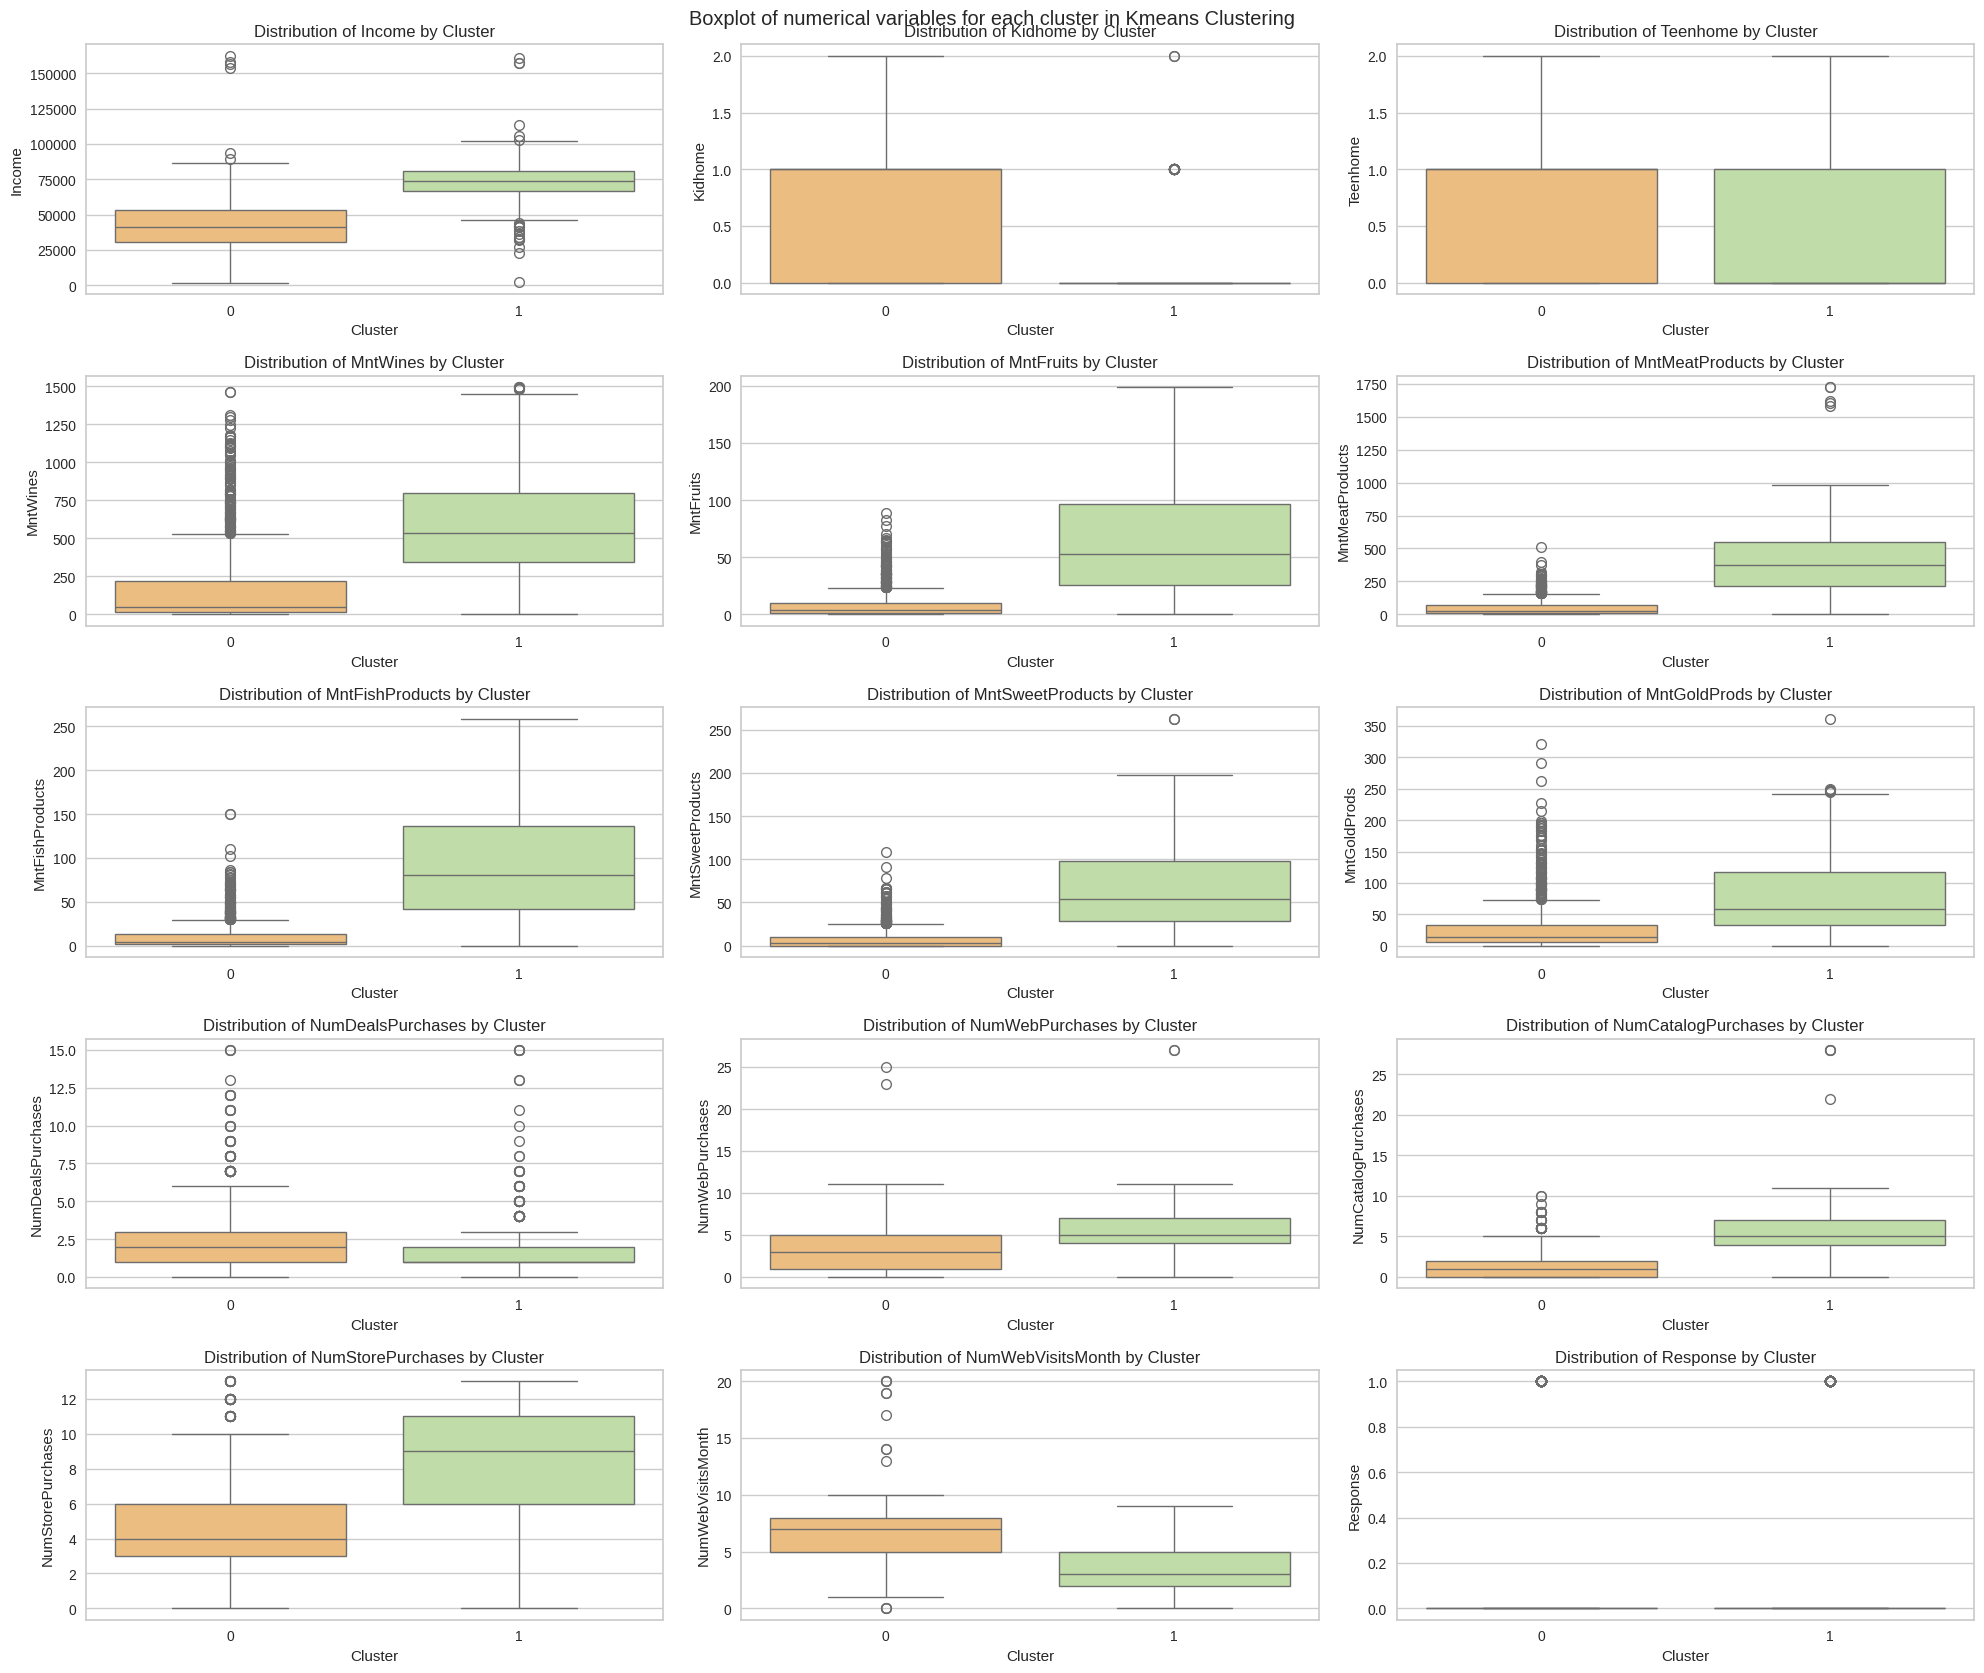

In [ ]:
plt.figure(figsize=(20, 20))  # Set the figure size for the plot
plt.suptitle("Boxplot of numerical variables for each cluster in Kmeans Clustering")  # Set the main title for the plot

# Iterate over each numerical variable in the dataframe
for i, variable in enumerate(data_clone1.columns.to_list()[:-1]):
    plt.subplot(6, 3, i + 1)  # Create subplots in a 3x4 grid, starting from index 1
    sns.boxplot(data=data_clone1, x="K_means_segments", y=variable, palette='Spectral')  # Fill: X=cluster labels, Y=current variable
    plt.title(f"Distribution of {variable} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(variable)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

**Observations:**
**Income-Based Segmentation:**

Cluster 0: Lower-income class

Cluster 1: Higher-income class

**Spending Behavior:**

Higher-income individuals:

Purchase more goods overall (aligned with heatmap trends).

Frequently buy via catalogs and online.

Lower-income individuals:

Spend less but engage more with web purchases (diverges from heatmap trends).

**Household Patterns:**

Lower class: Typically have 1–2 children.

Higher class: More often childless.

**Concluion:**
The clustering confirms income-driven divisions in spending and family size, with one exception: lowerincome groups show stronger online engagement than suggested by the heatmap. The deal purchase amount is similar in both cluters.

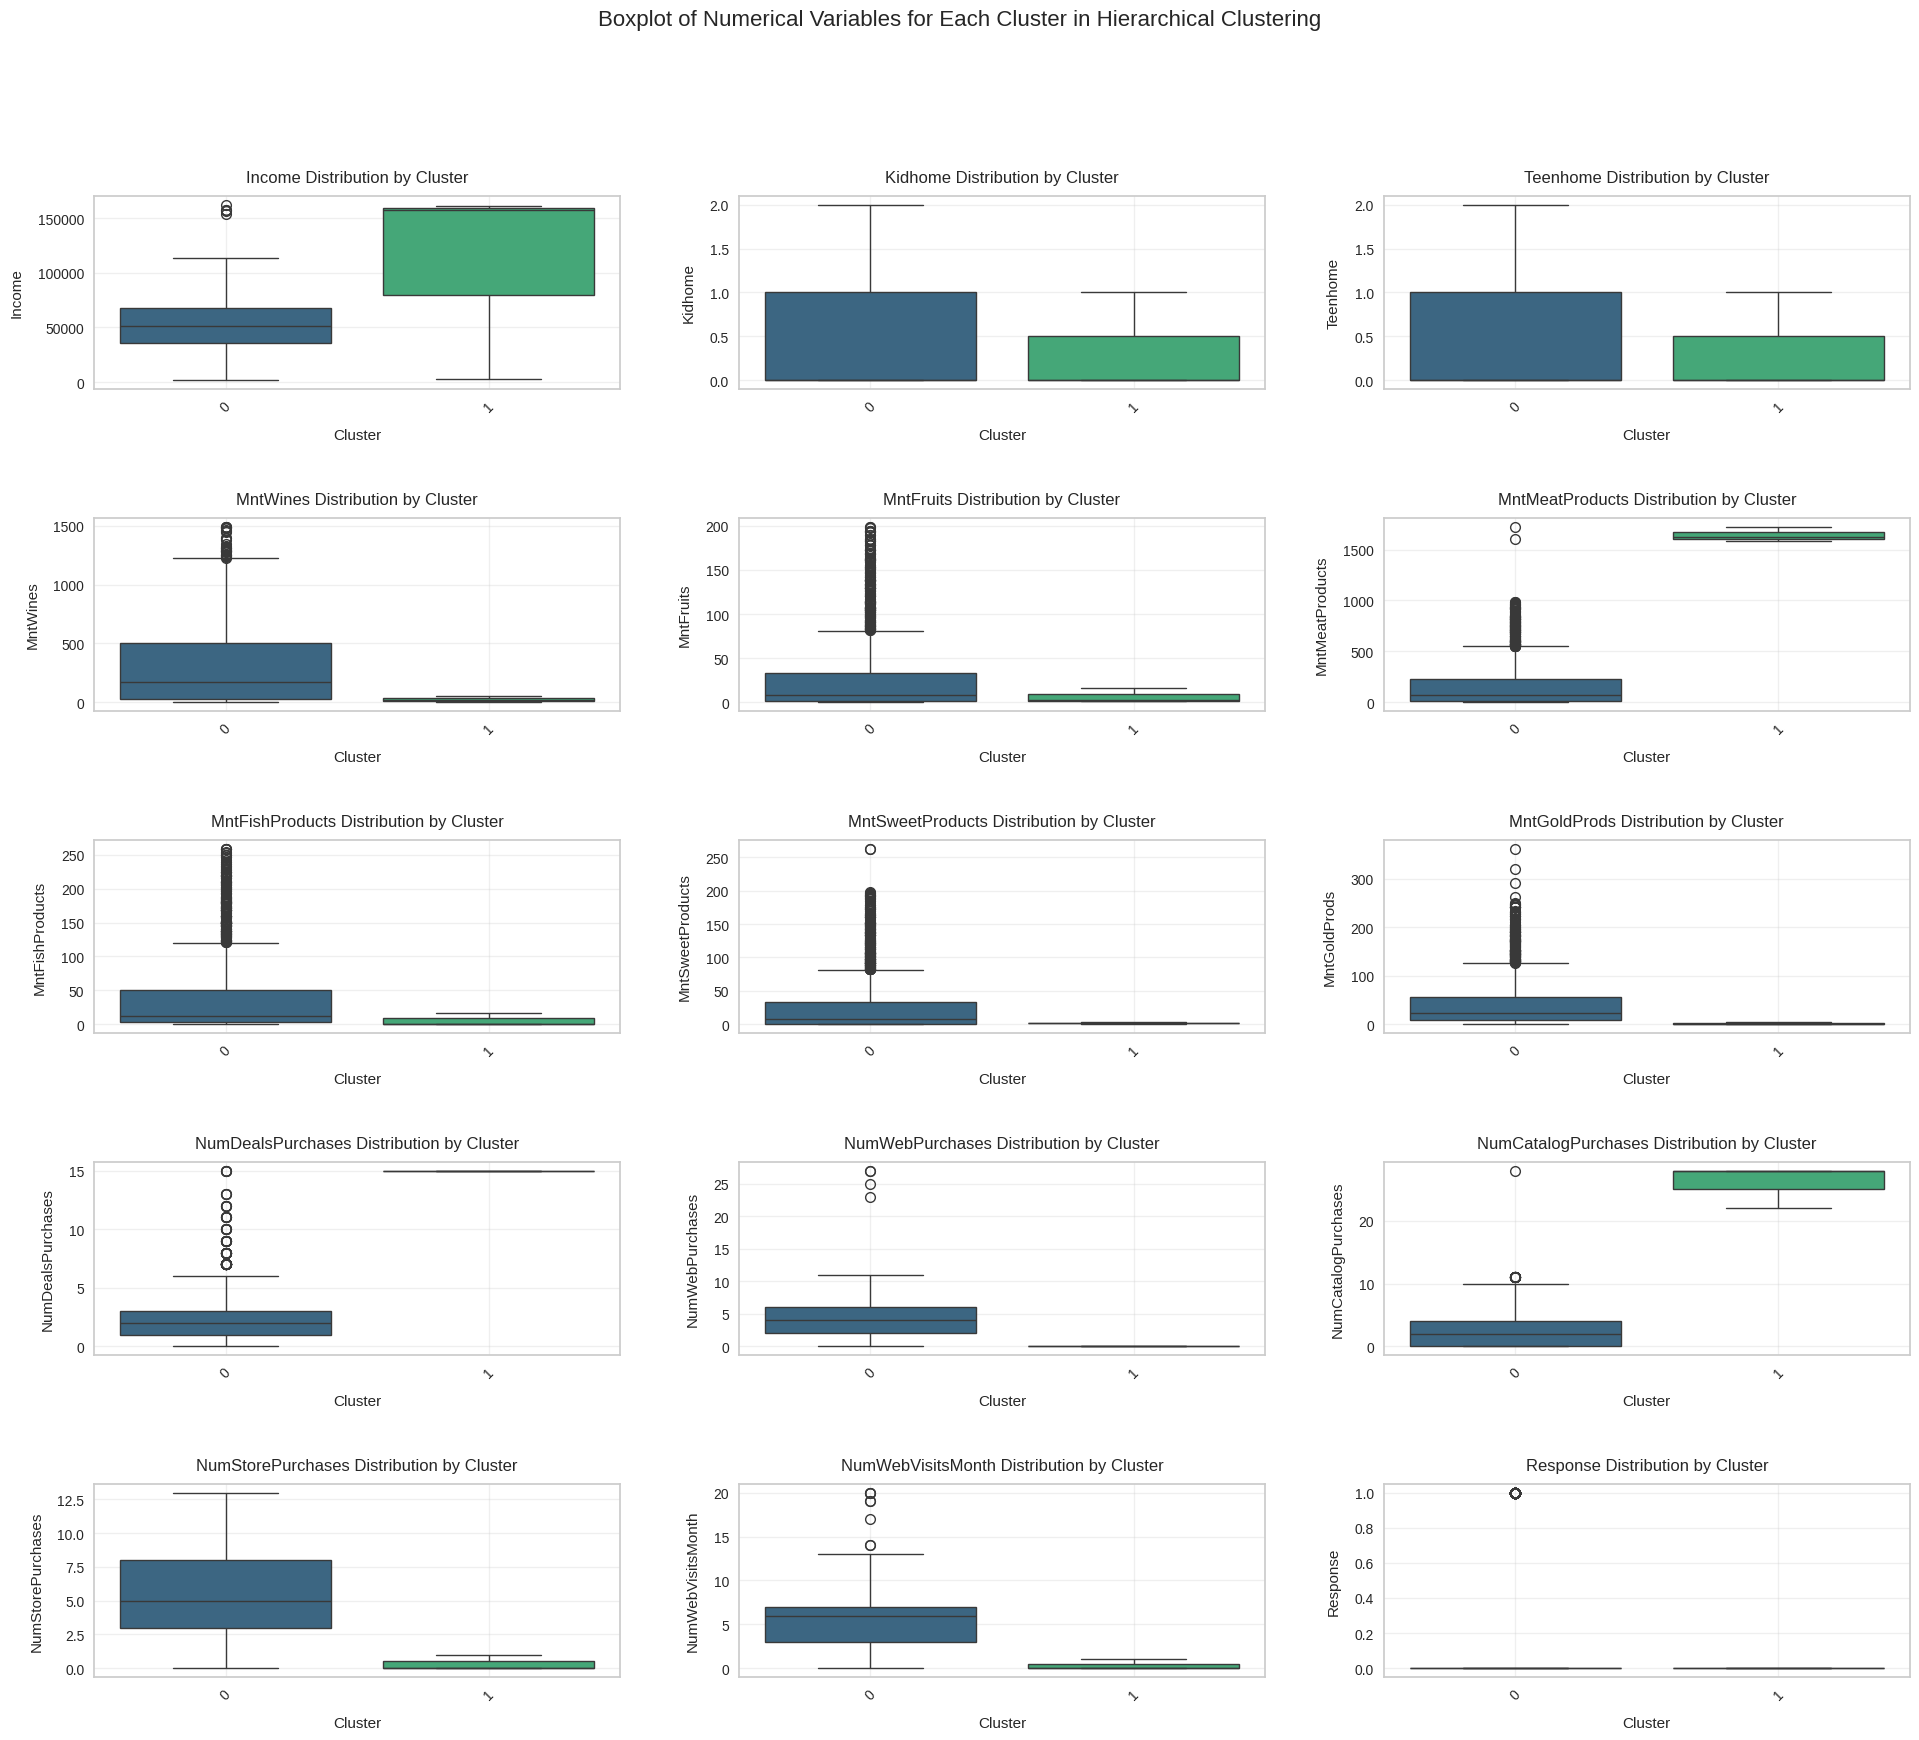

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of Numerical Variables for Each Cluster in Hierarchical Clustering",
             y=1.02, fontsize=16)  # Increased font size

num_vars = len(data_clone2.columns[:-1])
rows = 6
cols = 3
assert rows*cols >= num_vars, "Subplot grid too small for variables"

for i, variable in enumerate(data_clone2.columns[:-1]):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(data=data_clone2, x="HC_segments", y=variable, palette='viridis')
    plt.title(f"{variable} Distribution by Cluster", pad=10)
    plt.xlabel("Cluster", labelpad=10)
    plt.ylabel(variable, labelpad=10)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

plt.tight_layout(pad=3.0)
plt.show()

##### **Observations:**
**Hierarchical Clustering:**

Cluster 0: Low income

Cluster 1: High income (larger group than in K-Means)

**Diverging Trends from K-Means**
- Household Structure:

Hierarchical: High income = 1 child, Low income = 2 children

**Purchasing Behavior:**

Hierarchical: High income buys less in-store and prefers deals (contrasts with K-Means/heatmap)

**Consistent Findings**
Both methods agree high-income groups favor catalog purchases and are willing to spend more on meat producs.



#### **Question 15**: Perform Cluster profiling on the data with the appropriate algorithm determined above using a barplot. What observations can be derived for each cluster from this plot?

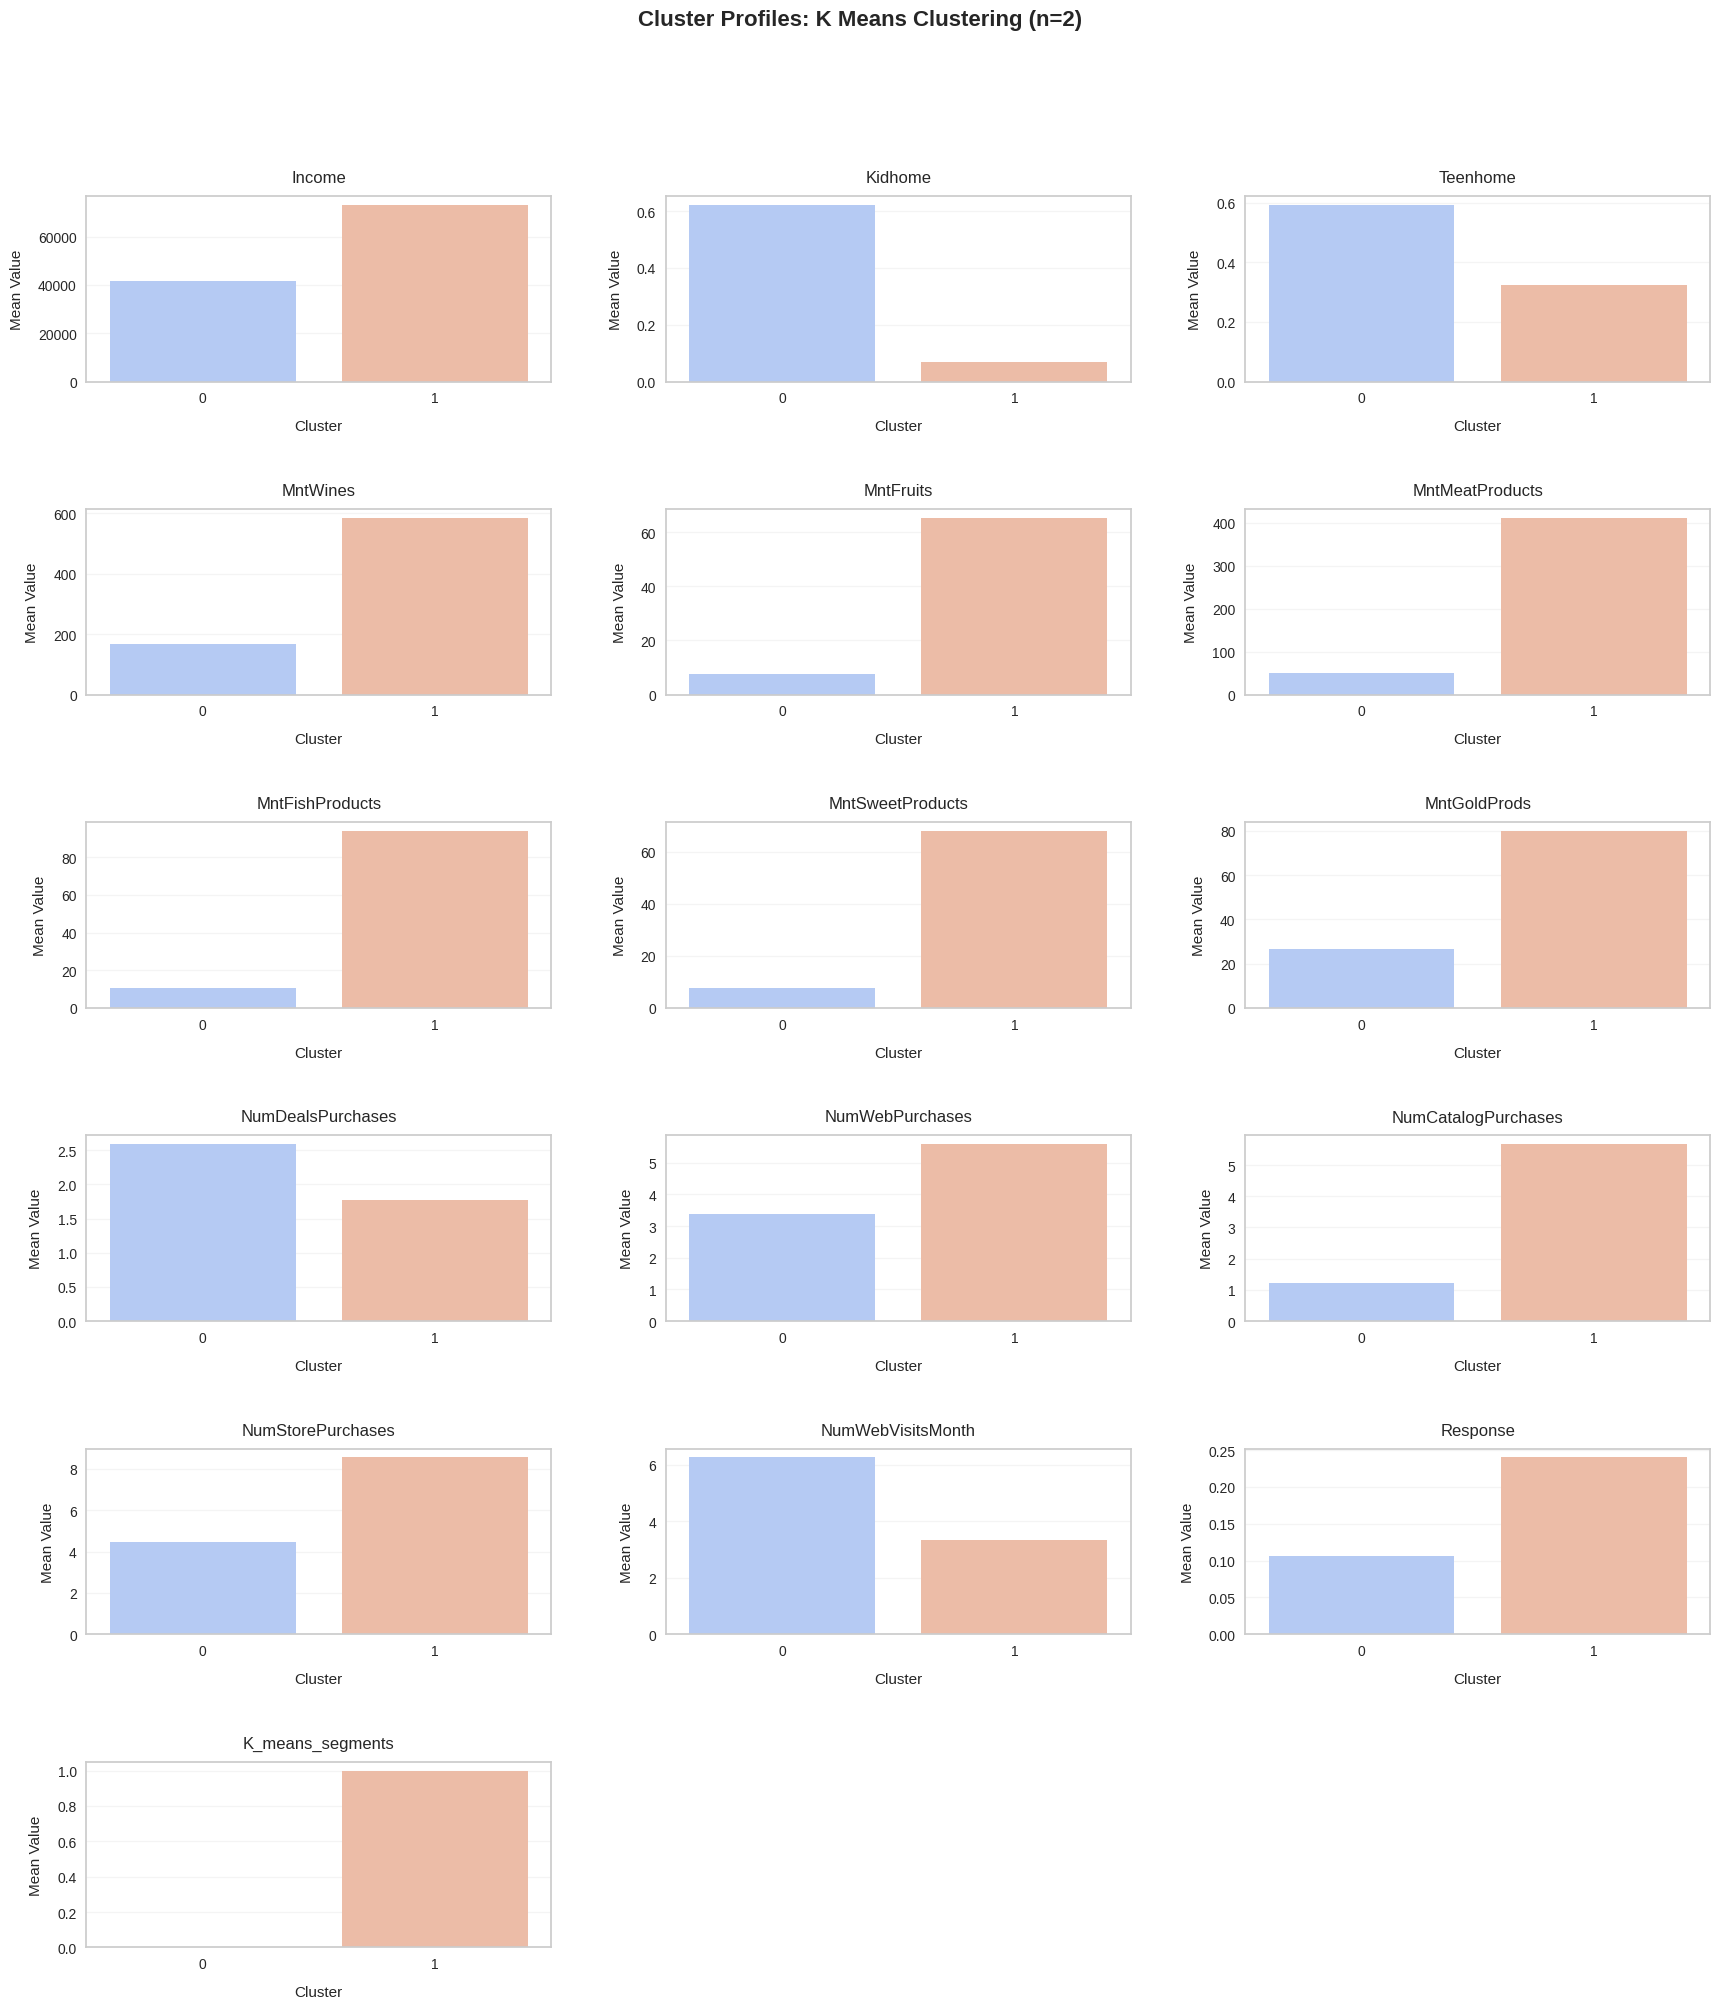

In [ ]:
# Generate cluster profiles using barplots
plt.figure(figsize=(18, 20))
plt.suptitle("Cluster Profiles: K Means Clustering (n=2)",
             y=1.02, fontsize=16, weight='bold')

# Plot each feature's distribution by cluster
for i, feature in enumerate(data_clone1.select_dtypes(include=['number']).columns):
    plt.subplot(6, 3, i+1)
    sns.barplot(data=data_clone1,
                x="K_means_segments",
                y=feature,
                palette='coolwarm',
                estimator=np.mean,
                errorbar=None)
    plt.title(f"{feature}", pad=10)
    plt.xlabel("Cluster", labelpad=10)
    plt.ylabel("Mean Value", labelpad=10)
    plt.grid(axis='y', alpha=0.2)

plt.tight_layout(pad=3.0)
plt.show()

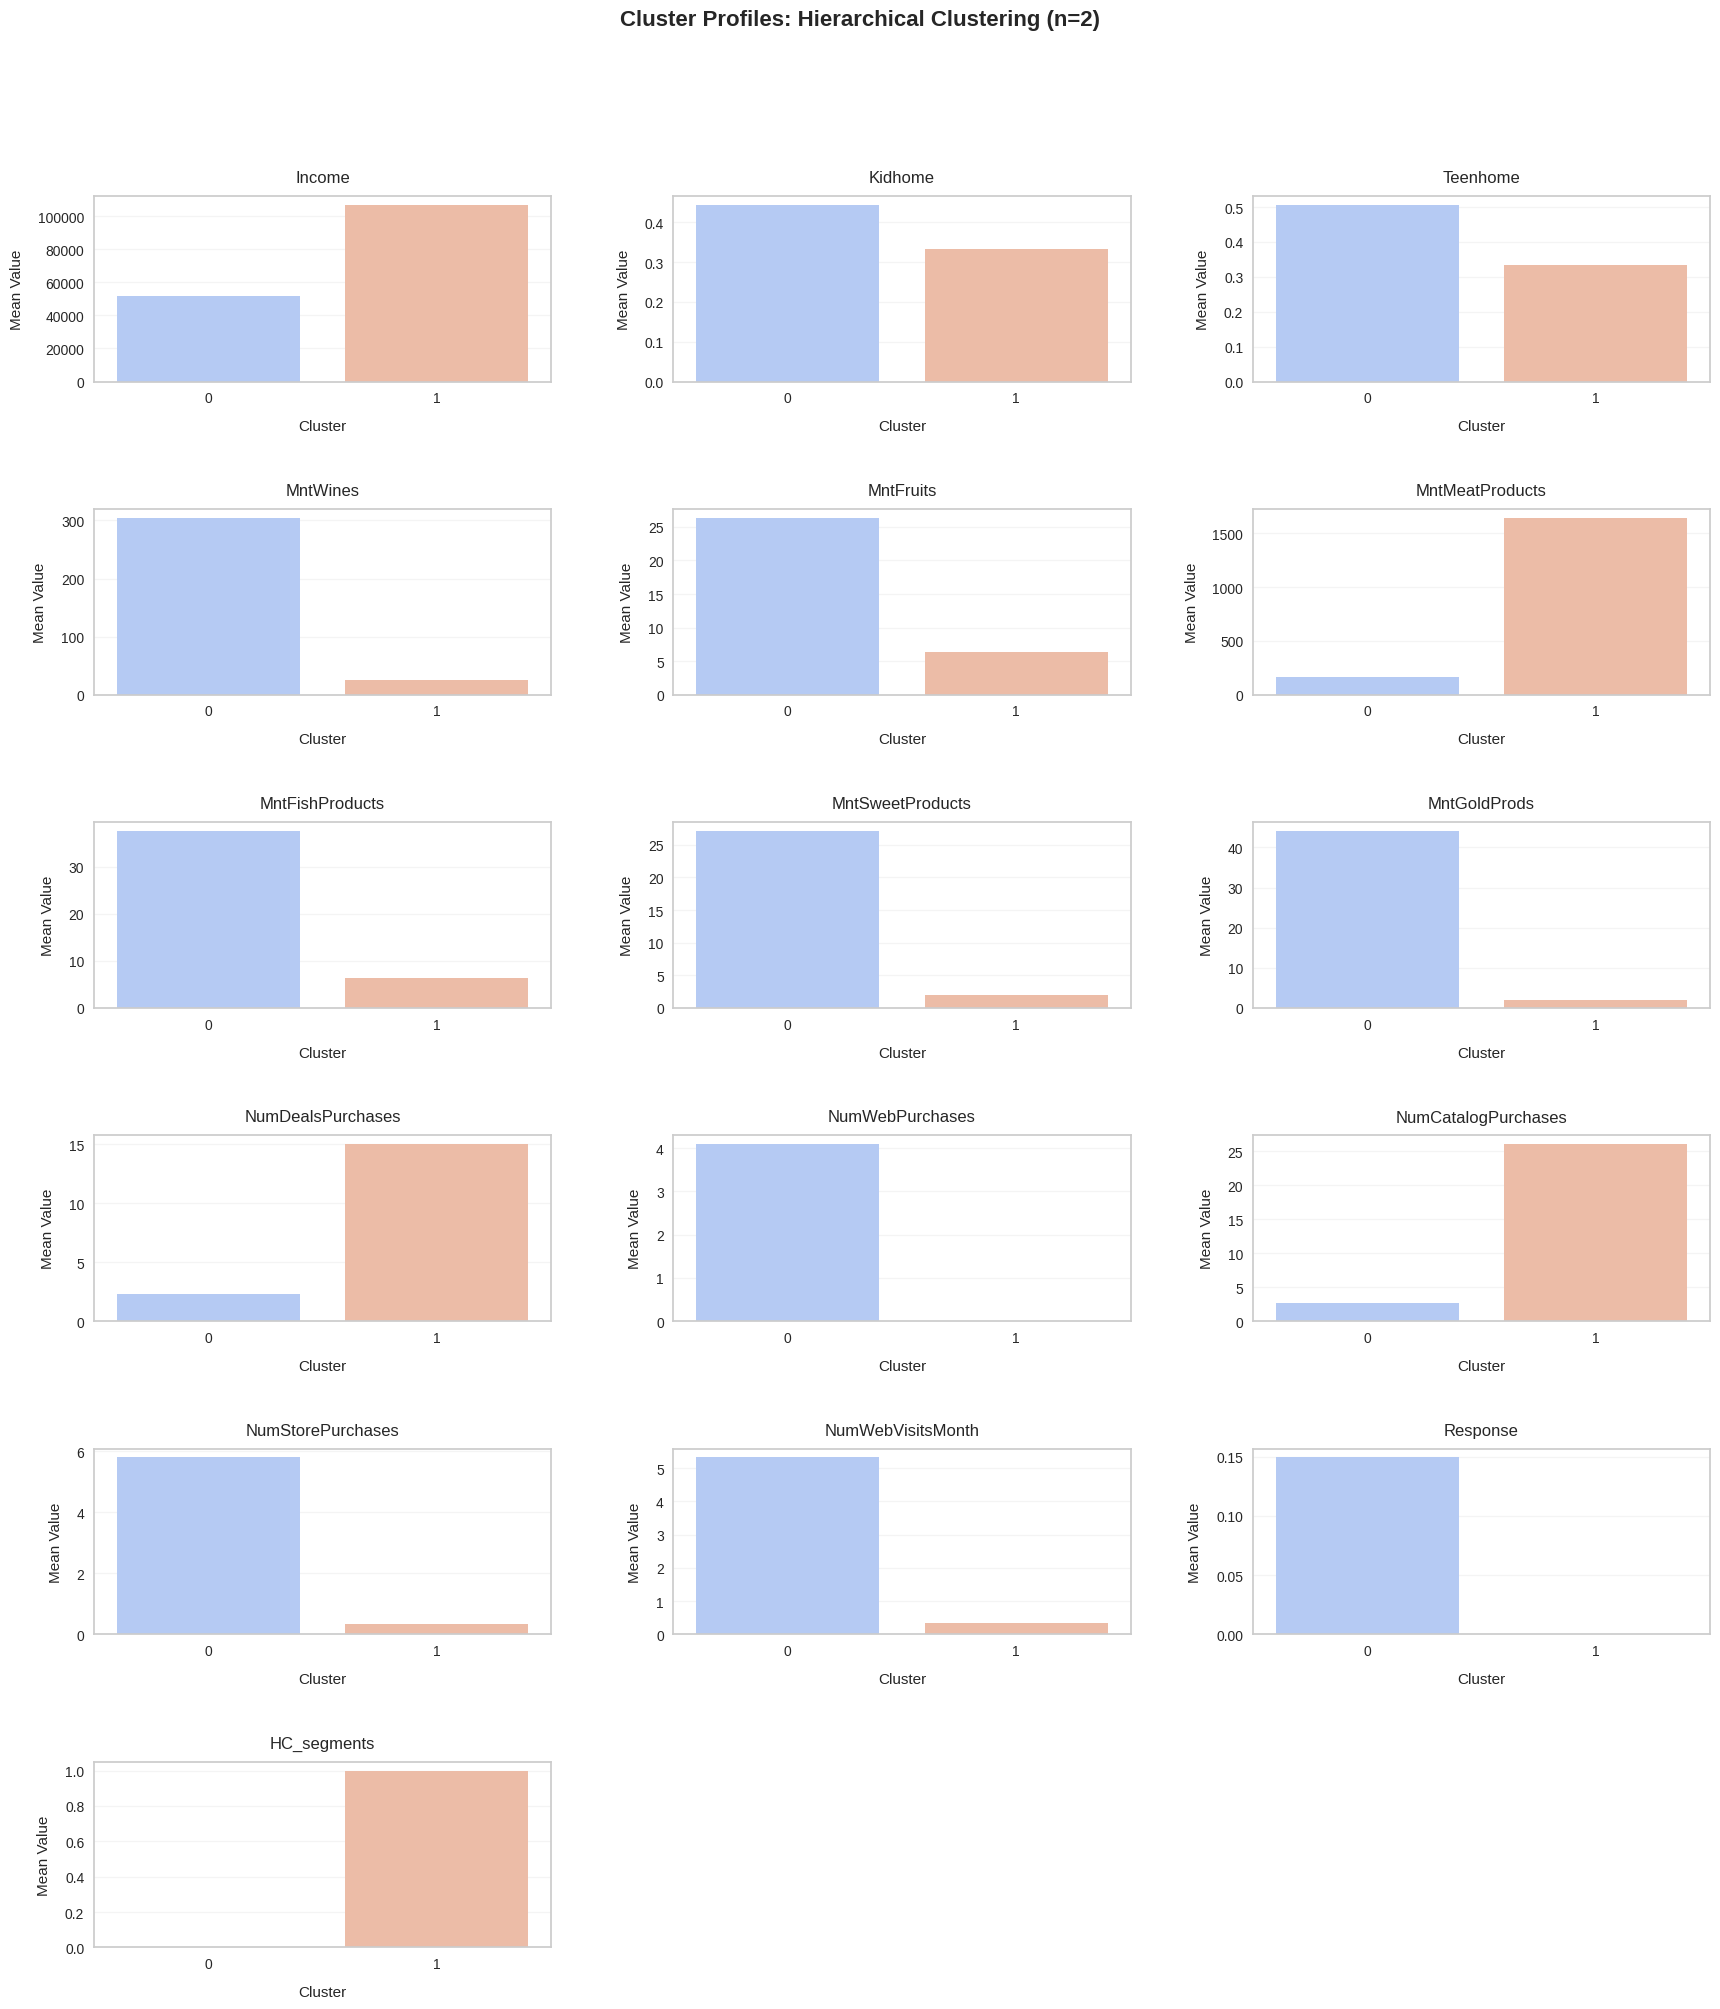

In [ ]:
# Generate cluster profiles using barplots
plt.figure(figsize=(18, 20))
plt.suptitle("Cluster Profiles: Hierarchical Clustering (n=2)",
             y=1.02, fontsize=16, weight='bold')

# Plot each feature's distribution by cluster
for i, feature in enumerate(data_clone2.select_dtypes(include=['number']).columns):
    plt.subplot(6, 3, i+1)
    sns.barplot(data=data_clone2,
                x="HC_segments",
                y=feature,
                palette='coolwarm',
                estimator=np.mean,
                errorbar=None)
    plt.title(f"{feature}", pad=10)
    plt.xlabel("Cluster", labelpad=10)
    plt.ylabel("Mean Value", labelpad=10)
    plt.grid(axis='y', alpha=0.2)

plt.tight_layout(pad=3.0)
plt.show()

##### **Observations:**

- In both bar plots the bar plots correspond to the box plots.  

- Cluster 0 (Bars Lower): Lower-income group
- Cluster 1 (Bars Higher): Higher-income group
- Note: Like box plots, bar heights show mean values, but without distribution details (e.g., outliers).

Bar plots simplify comparisons vs. box plots’ spread details.

Precision: Bars show means only use box plots to see variance and outliers.

## **Business Recommedations**


- 2 clusters distinctly formed using both methodologies.
- Cluster 1 has high income customers.
- Cluster 0 has low income customers


**Targeted Recommendations Based on Clusters & Heatmap**

**1. For High-Income (Cluster 1)**
- Premium Catalogs: Bundle meat + wine + sweets (ρ=0.58) with luxury packaging.

- Exclusive Perks: Early access to high-end products (aligned with Campaign 5 responders).

- In-Store Events: Wine tastings or gourmet bites (ρ=0.58 in-store preference).

**2. For Low-Income (Cluster 0)**
- Web Deals: "Family Meal Kits" (target Kidhome, ρ=-0.23) with discounts.

- Retargeting Ads: Highlight forgotten cart items (high web visits).

- Offer deals.

**3. Campaigns**
- Cross-Promote: Offer Campaign 1+4+5 responders bundled discounts.

- Exclude Low-Spenders: Avoid targeting parents (Kidhome ρ=-0.23 reduces overall spending).

**4. Channel Optimization**
- High-Income: Premium products in catalogs.

- Low-Income: Online promotions with deals.



**Data Backing:**

Income ↔ Meat (0.58), Catalogs (0.59), Web ↔ Store (-0.48).

Campaign 5 ↔ Income (0.34), Cmp1 (0.40).

By focusing on these strategies, the company can enhance engagement, increase revenue, and strengthen customer loyalty across all clusters.